In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering

%matplotlib inline

In [241]:
filepath='US_O365Home_PDP_Order_NoOrder_CSV.csv'

In [300]:
df = pd.read_csv(filepath)
df.head()

MC1ID  Paid Order Exists  Try Exists  \
0  50637eab03a94c59bb460e2e89adf021                0.0         0.0   
1  0ae3949b44364d0d9686d8022b3229f4                0.0         0.0   
2  bb7e2062bd4142a194eaa8818bf04169                1.0         0.0   
3  c3d457532b31409da308173a867c96b5                1.0         0.0   
4  0bc59fdb65094105bb31a39094df49d4                1.0         0.0   

   Device Orders_Office  Total Visits  New Visitors  Return Visitors  \
0                   3.0           3.0           0.0              1.0   
1                   2.0           2.0           1.0              0.0   
2                   1.0           1.0           0.0              1.0   
3                   1.0           1.0           0.0              1.0   
4                   1.0           1.0           0.0              1.0   

   Enter PDP from Office.com  Enter PDP from Store  Enter PDP from O365 Web  \
0                        0.0                   0.0                      0.0   
1                        0.0                   0.0                      0.0   
2                        0.0                   0.0                      1.0   
3                        0.0                   0.0                      0.0   
4                        0.0                   0.0                      0.0   

   Time Spent per Visit (seconds)  Average Time Spent on Page (seconds)  \
0                      663.333333                                   NaN   
1                      540.500000                                  17.0   
2                     1514.000000                                  28.5   
3                     2544.000000                                  21.0   
4                      865.000000                                   NaN   

   Link Clicks (e4)  Link Clicks on OverviewTab  Link Clicks on TechSpecsTab  \
0             145.0                         0.0                          4.0   
1               7.0                         0.0                          0.0   
2              76.0                         0.0                          0.0   
3             114.0                         0.0                          0.0   
4              34.0                         0.0                          0.0   

   Link Clicks on ReviewTab  Link Clicks on FAQTab  \
0                       4.0                    0.0   
1                       0.0                    0.0   
2                       0.0                    0.0   
3                       0.0                    0.0   
4                       0.0                    0.0   

   Link Clicks on AddtoCartButton  Link Clicks on Trial link  
0                             0.0                        0.0  
1                             0.0                        0.0  
2                             0.0                        0.0  
3                             0.0                        0.0  
4                             0.0                        2.0

## EDA


In [301]:
df['Paid Order Exists'].value_counts()

0.0    1596
1.0     183
Name: Paid Order Exists, dtype: int64

In [302]:
df['Try Exists'].value_counts()

0.0    1729
1.0      50
Name: Try Exists, dtype: int64

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383 entries, 0 to 2382
Data columns (total 19 columns):
MC1ID                                   1779 non-null object
Paid Order Exists                       1779 non-null float64
Try Exists                              1779 non-null float64
Device Orders_Office                    1779 non-null float64
Total Visits                            1779 non-null float64
New Visitors                            1779 non-null float64
Return Visitors                         1779 non-null float64
Enter PDP from Office.com               1779 non-null float64
Enter PDP from Store                    1779 non-null float64
Enter PDP from O365 Web                 1779 non-null float64
Time Spent per Visit (seconds)          1582 non-null float64
Average Time Spent on Page (seconds)    635 non-null float64
Link Clicks (e4)                        1779 non-null float64
Link Clicks on OverviewTab              1779 non-null float64
Link Clicks on TechSpecsTab

In [246]:
df.describe()

Paid Order Exists   Try Exists  Device Orders_Office  Total Visits  \
count        1779.000000  1779.000000           1779.000000   1779.000000   
mean            0.102867     0.028106              0.010680      1.132659   
std             0.303870     0.165321              0.122766      0.486426   
min             0.000000     0.000000              0.000000      1.000000   
25%             0.000000     0.000000              0.000000      1.000000   
50%             0.000000     0.000000              0.000000      1.000000   
75%             0.000000     0.000000              0.000000      1.000000   
max             1.000000     1.000000              3.000000      7.000000   

       New Visitors  Return Visitors  Enter PDP from Office.com  \
count   1779.000000      1779.000000                1779.000000   
mean       0.519955         0.480045                   0.062957   
std        0.499742         0.499742                   0.256467   
min        0.000000         0.000000                   0.000000   
25%        0.000000         0.000000                   0.000000   
50%        1.000000         0.000000                   0.000000   
75%        1.000000         1.000000                   0.000000   
max        1.000000         1.000000                   3.000000   

       Enter PDP from Store  Enter PDP from O365 Web  \
count           1779.000000              1779.000000   
mean               0.320967                 0.411467   
std                0.521597                 0.544327   
min                0.000000                 0.000000   
25%                0.000000                 0.000000   
50%                0.000000                 0.000000   
75%                1.000000                 1.000000   
max                4.000000                 5.000000   

       Time Spent per Visit (seconds)  Average Time Spent on Page (seconds)  \
count                     1582.000000                            635.000000   
mean                       475.342801                            106.550429   
std                        859.000278                            239.215555   
min                          1.000000                              1.000000   
25%                         26.000000                              8.625000   
50%                        165.000000                             22.000000   
75%                        571.500000                             71.000000   
max                      11193.000000                           1772.000000   

       Link Clicks (e4)  Link Clicks on OverviewTab  \
count       1779.000000                 1779.000000   
mean          22.560427                    0.010118   
std           43.084832                    0.120502   
min            0.000000                    0.000000   
25%            2.000000                    0.000000   
50%            8.000000                    0.000000   
75%           26.000000                    0.000000   
max          950.000000                    2.000000   

       Link Clicks on TechSpecsTab  Link Clicks on ReviewTab  \
count                  1779.000000               1779.000000   
mean                      0.041034                  0.017426   
std                       0.325176                  0.168464   
min                       0.000000                  0.000000   
25%                       0.000000                  0.000000   
50%                       0.000000                  0.000000   
75%                       0.000000                  0.000000   
max                       8.000000                  4.000000   

       Link Clicks on FAQTab  Link Clicks on AddtoCartButton  \
count            1779.000000                     1779.000000   
mean                0.017426                        0.227094   
std                 0.178198                        1.408686   
min                 0.000000                        0.000000   
25%                 0.000000                        0.000000   
50%                 0.000000       

## Link Clicks

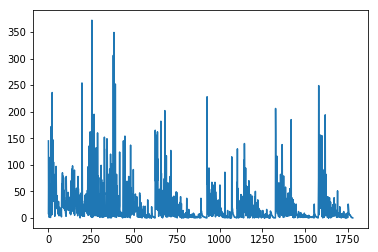

In [314]:
plt.plot(df['Link Clicks (e4)'])

In [310]:
idx =df.index[df['Link Clicks (e4)']>400]

In [312]:
idx.tolist()

[277, 1577]

In [313]:
df.drop(idx.tolist(), inplace= True)

### Time Spent per Visit (seconds)

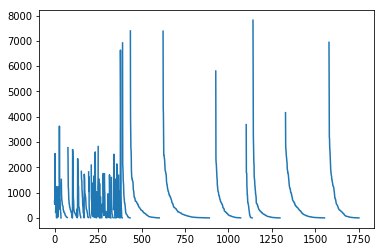

In [319]:
plt.plot(df['Time Spent per Visit (seconds)'])

In [317]:
idx =df.index[df['Time Spent per Visit (seconds)']>8000]
idx.tolist()

[1327]

In [318]:
df.drop(idx.tolist(), inplace= True)

### Average Time Spent on Page (seconds)

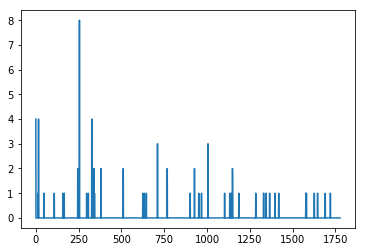

In [322]:
plt.plot(df['Link Clicks on TechSpecsTab'])

In [325]:
idx = df.index[df['Link Clicks on TechSpecsTab']>4]
idx.tolist()

[255]

In [326]:
df.drop(idx.tolist(), inplace = True)

### Link Clicks on ReviewTab

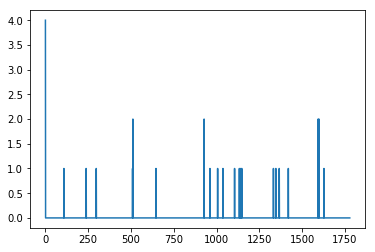

In [327]:
plt.plot(df['Link Clicks on ReviewTab'])

In [328]:
df[df['Link Clicks on ReviewTab']>2]

MC1ID  Paid Order Exists  Try Exists  \
0  50637eab03a94c59bb460e2e89adf021                0.0         0.0   

   Device Orders_Office  Total Visits  New Visitors  Return Visitors  \
0                   3.0           3.0           0.0              1.0   

   Enter PDP from Office.com  Enter PDP from Store  Enter PDP from O365 Web  \
0                        0.0                   0.0                      0.0   

   Time Spent per Visit (seconds)  Average Time Spent on Page (seconds)  \
0                      663.333333                                   NaN   

   Link Clicks (e4)  Link Clicks on OverviewTab  Link Clicks on TechSpecsTab  \
0             145.0                         0.0                          4.0   

   Link Clicks on ReviewTab  Link Clicks on FAQTab  \
0                       4.0                    0.0   

   Link Clicks on AddtoCartButton  Link Clicks on Trial link  
0                             0.0                        0.0

In [332]:
idx = df.index[df['Link Clicks on ReviewTab']>2]
df.drop(idx.tolist(), inplace = True)

### Link Clicks on FAQTab

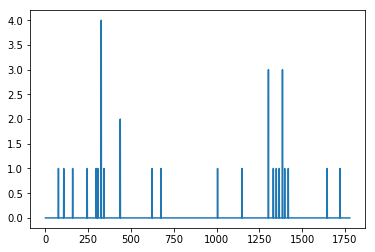

In [333]:
plt.plot(df['Link Clicks on FAQTab'])

In [334]:
idx = df.index[df['Link Clicks on FAQTab']>3]
df.drop(idx.tolist(), inplace=True)

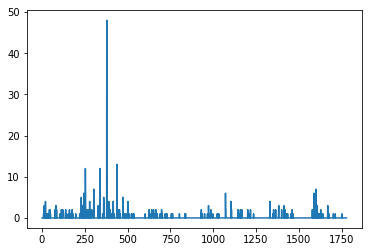

In [411]:
plt.plot(df['Link Clicks on AddtoCartButton'])

In [412]:
idx = df.index[df['Link Clicks on AddtoCartButton']>15]

In [414]:
idx.tolist()
df.drop(idx.tolist(), inplace=True)

In [415]:
# there are two entries for few MC1IDs - pull data again
# df.groupby(['MC1ID']).count()['Order Exists'] 

In [416]:
df.columns

Index(['MC1ID', 'Paid Order Exists', 'Try Exists', 'Device Orders_Office',
       'Total Visits', 'New Visitors', 'Return Visitors',
       'Enter PDP from Office.com', 'Enter PDP from Store',
       'Enter PDP from O365 Web', 'Time Spent per Visit (seconds)',
       'Average Time Spent on Page (seconds)', 'Link Clicks (e4)',
       'Link Clicks on OverviewTab', 'Link Clicks on TechSpecsTab',
       'Link Clicks on ReviewTab', 'Link Clicks on FAQTab',
       'Link Clicks on AddtoCartButton', 'Link Clicks on Trial link'],
      dtype='object')

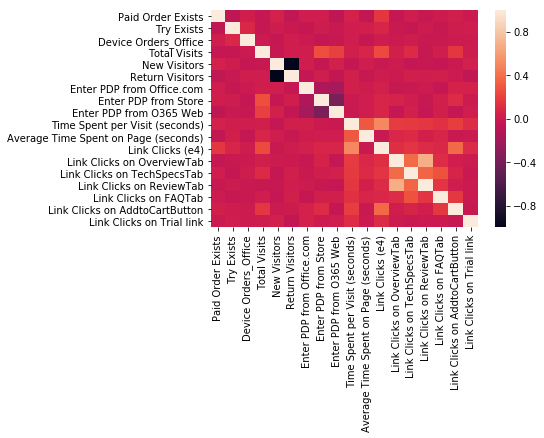

In [417]:
sns.heatmap(df.corr())

In [418]:
df_corr = df.corr()
df_corr.head()

Paid Order Exists  Try Exists  Device Orders_Office  \
Paid Order Exists              1.000000   -0.057827              0.024896   
Try Exists                    -0.057827    1.000000              0.086524   
Device Orders_Office           0.024896    0.086524              1.000000   
Total Visits                  -0.032794   -0.024307             -0.000585   
New Visitors                   0.054109    0.013152             -0.026370   

                      Total Visits  New Visitors  Return Visitors  \
Paid Order Exists        -0.032794      0.054109        -0.054109   
Try Exists               -0.024307      0.013152        -0.013152   
Device Orders_Office     -0.000585     -0.026370         0.026370   
Total Visits              1.000000     -0.022166         0.022166   
New Visitors             -0.022166      1.000000        -1.000000   

                      Enter PDP from Office.com  Enter PDP from Store  \
Paid Order Exists                      0.017568              0.026647   
Try Exists                            -0.028661              0.013164   
Device Orders_Office                  -0.000247             -0.033854   
Total Visits                           0.030611              0.260938   
New Visitors                           0.024621             -0.025425   

                      Enter PDP from O365 Web  Time Spent per Visit (seconds)  \
Paid Order Exists                   -0.062071                        0.051800   
Try Exists                          -0.009672                        0.015829   
Device Orders_Office                -0.016283                        0.017155   
Total Visits                         0.203969                        0.032606   
New Visitors                         0.046559                       -0.036415   

                      Average Time Spent on Page (seconds)  Link Clicks (e4)  \
Paid Order Exists                                -0.045194          0.161185   
Try Exists                                        0.038219          0.070457   
Device Orders_Office                             -0.029295          0.009823   
Total Visits                                      0.074790          0.244814   
New Visitors                                      0.017712         -0.012449   

                      Link Clicks on OverviewTab  Link Clicks on TechSpecsTab  \
Paid Order Exists                      -0.028559                     0.017092   
Try Exists                             -0.014340                    -0.023905   
Device Orders_Office                   -0.007570                     0.011899   
Total Visits                            0.036175                     0.101542   
New Visitors                            0.005747                    -0.038047   

                      Link Clicks on ReviewTab  Link Clicks on FAQTab  \
Paid Order Exists                    -0.021611               0.002593   
Try Exists                            0.007396              -0.017155   
Device Orders_Office                 -0.009349              -0.009056   
Total Visits                         -0.019181               0.027657   
New Visitors                         -0.016946              -0.037912   

                      Link Clicks on AddtoCartButton  \
Paid Order Exists                           0.035567   
Try Exists                                  0.008757   
Device Orders_Office                        0.005711   
Total Visits                                0.157522   
New Visitors                               -0.007524   

                      Link Clicks on Trial link  
Paid Order Exists                     -0.007802  
Try Exists                             0.017478  
Device Orders_Office                   0.001181  
Total Visits                           0.009571  
New Visitors                           0.039523

In [419]:
df_corr.loc[(df_corr['Paid Order Exists']>0.05) | (df_corr['Paid Order Exists']<-0.05),'Paid Order Exists']

Paid Order Exists                 1.000000
Try Exists                       -0.057827
New Visitors                      0.054109
Return Visitors                  -0.054109
Enter PDP from O365 Web          -0.062071
Time Spent per Visit (seconds)    0.051800
Link Clicks (e4)                  0.161185
Name: Paid Order Exists, dtype: float64

In [420]:
( df_corr[(df_corr>0.05) | (df_corr<-0.05)])

Paid Order Exists  Try Exists  \
Paid Order Exists                              1.000000   -0.057827   
Try Exists                                    -0.057827    1.000000   
Device Orders_Office                                NaN    0.086524   
Total Visits                                        NaN         NaN   
New Visitors                                   0.054109         NaN   
Return Visitors                               -0.054109         NaN   
Enter PDP from Office.com                           NaN         NaN   
Enter PDP from Store                                NaN         NaN   
Enter PDP from O365 Web                       -0.062071         NaN   
Time Spent per Visit (seconds)                 0.051800         NaN   
Average Time Spent on Page (seconds)                NaN         NaN   
Link Clicks (e4)                               0.161185    0.070457   
Link Clicks on OverviewTab                          NaN         NaN   
Link Clicks on TechSpecsTab                         NaN         NaN   
Link Clicks on ReviewTab                            NaN         NaN   
Link Clicks on FAQTab                               NaN         NaN   
Link Clicks on AddtoCartButton                      NaN         NaN   
Link Clicks on Trial link                           NaN         NaN   

                                      Device Orders_Office  Total Visits  \
Paid Order Exists                                      NaN           NaN   
Try Exists                                        0.086524           NaN   
Device Orders_Office                              1.000000           NaN   
Total Visits                                           NaN      1.000000   
New Visitors                                           NaN           NaN   
Return Visitors                                        NaN           NaN   
Enter PDP from Office.com                              NaN           NaN   
Enter PDP from Store                                   NaN      0.260938   
Enter PDP from O365 Web                                NaN      0.203969   
Time Spent per Visit (seconds)                         NaN           NaN   
Average Time Spent on Page (seconds)                   NaN      0.074790   
Link Clicks (e4)                                       NaN      0.244814   
Link Clicks on OverviewTab                             NaN           NaN   
Link Clicks on TechSpecsTab                            NaN      0.101542   
Link Clicks on ReviewTab                               NaN           NaN   
Link Clicks on FAQTab                                  NaN           NaN   
Link Clicks on AddtoCartButton                         NaN      0.157522   
Link Clicks on Trial link                              NaN           NaN   

                                      New Visitors  Return Visitors  \
Paid Order Exists                         0.054109        -0.054109   
Try Exists                                     NaN              NaN   
Device Orders_Office                           NaN              NaN   
Total Visits                                   NaN              NaN   
New Visitors                              1.000000        -1.000000   
Return Visitors                          -1.000000         1.000000   
Enter PDP from Office.com                      NaN              NaN   
Enter PDP from Store                           NaN              NaN   
Enter PDP from O365 Web                        NaN              NaN   
Time Spent per Visit (seconds)                 NaN              NaN   
Average Time Spent on Page (seconds)           NaN              NaN   
Link Clicks (e4)                               NaN              NaN   
Link Clicks on OverviewTab                     NaN              NaN   
Link Clicks on TechSpecsTab                    NaN              NaN   
Link Clicks on ReviewTab                       NaN              NaN   
Link Clicks on FAQTab                          NaN              NaN   
Link Clicks on AddtoCartButton      

In [421]:
df_prep1 = df.drop(['MC1ID', 'Try Exists', 'Return Visitors', 'Link Clicks on Trial link', 'Enter PDP from Office.com'], axis =1)
cols_standard = df_prep1.columns
df_prep1.head()

Paid Order Exists  Device Orders_Office  Total Visits  New Visitors  \
1                0.0                   2.0           2.0           1.0   
2                1.0                   1.0           1.0           0.0   
3                1.0                   1.0           1.0           0.0   
4                1.0                   1.0           1.0           0.0   
5                0.0                   1.0           1.0           1.0   

   Enter PDP from Store  Enter PDP from O365 Web  \
1                   0.0                      0.0   
2                   0.0                      1.0   
3                   0.0                      0.0   
4                   0.0                      0.0   
5                   0.0                      0.0   

   Time Spent per Visit (seconds)  Average Time Spent on Page (seconds)  \
1                           540.5                                  17.0   
2                          1514.0                                  28.5   
3                          2544.0                                  21.0   
4                           865.0                                   NaN   
5                             NaN                                   NaN   

   Link Clicks (e4)  Link Clicks on OverviewTab  Link Clicks on TechSpecsTab  \
1               7.0                         0.0                          0.0   
2              76.0                         0.0                          0.0   
3             114.0                         0.0                          0.0   
4              34.0                         0.0                          0.0   
5               1.0                         0.0                          0.0   

   Link Clicks on ReviewTab  Link Clicks on FAQTab  \
1                       0.0                    0.0   
2                       0.0                    0.0   
3                       0.0                    0.0   
4                       0.0                    0.0   
5                       0.0                    0.0   

   Link Clicks on AddtoCartButton  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  
5                             0.0

In [422]:
df_prep1.fillna(df_prep1.mean(), inplace=True)

In [423]:
df_prep_corr = df_prep1.corr()
df_prep_corr[df_prep_corr >0.05]

Paid Order Exists  Device Orders_Office  \
Paid Order Exists                              1.000000                   NaN   
Device Orders_Office                                NaN                   1.0   
Total Visits                                        NaN                   NaN   
New Visitors                                   0.054109                   NaN   
Enter PDP from Store                                NaN                   NaN   
Enter PDP from O365 Web                             NaN                   NaN   
Time Spent per Visit (seconds)                 0.050559                   NaN   
Average Time Spent on Page (seconds)                NaN                   NaN   
Link Clicks (e4)                               0.161185                   NaN   
Link Clicks on OverviewTab                          NaN                   NaN   
Link Clicks on TechSpecsTab                         NaN                   NaN   
Link Clicks on ReviewTab                            NaN                   NaN   
Link Clicks on FAQTab                               NaN                   NaN   
Link Clicks on AddtoCartButton                      NaN                   NaN   

                                      Total Visits  New Visitors  \
Paid Order Exists                              NaN      0.054109   
Device Orders_Office                           NaN           NaN   
Total Visits                              1.000000           NaN   
New Visitors                                   NaN      1.000000   
Enter PDP from Store                      0.260938           NaN   
Enter PDP from O365 Web                   0.203969           NaN   
Time Spent per Visit (seconds)                 NaN           NaN   
Average Time Spent on Page (seconds)      0.050714           NaN   
Link Clicks (e4)                          0.244814           NaN   
Link Clicks on OverviewTab                     NaN           NaN   
Link Clicks on TechSpecsTab               0.101542           NaN   
Link Clicks on ReviewTab                       NaN           NaN   
Link Clicks on FAQTab                          NaN           NaN   
Link Clicks on AddtoCartButton            0.157522           NaN   

                                      Enter PDP from Store  \
Paid Order Exists                                      NaN   
Device Orders_Office                                   NaN   
Total Visits                                      0.260938   
New Visitors                                           NaN   
Enter PDP from Store                              1.000000   
Enter PDP from O365 Web                                NaN   
Time Spent per Visit (seconds)                         NaN   
Average Time Spent on Page (seconds)                   NaN   
Link Clicks (e4)                                  0.077146   
Link Clicks on OverviewTab                        0.056318   
Link Clicks on TechSpecsTab                            NaN   
Link Clicks on ReviewTab                               NaN   
Link Clicks on FAQTab                                  NaN   
Link Clicks on AddtoCartButton                    0.105433   

                                      Enter PDP from O365 Web  \
Paid Order Exists                                         NaN   
Device Orders_Office                                      NaN   
Total Visits                                         0.203969   
New Visitors                                              NaN   
Enter PDP from Store                                      NaN   
Enter PDP from O365 Web                              1.000000   
Time Spent per Visit (seconds)                            NaN   
Average Time Spent on Page (seconds)                      NaN   
Link Clicks (e4)                                     0.072219   
Link Clicks on OverviewTab                                NaN   
Link Clicks on TechSpecsTab                               NaN   
Link Clicks on ReviewTab                                  NaN   
Link Clicks on FAQTab    

In [424]:
ss = StandardScaler()
df_prep2 = ss.fit_transform(df_prep1)

In [425]:
d =df_prep2.tolist()


In [426]:
df_standard =  pd.DataFrame(data= d, columns=cols_standard)
df_standard.head()

Paid Order Exists  Device Orders_Office  Total Visits  New Visitors  \
0          -0.392966             22.966864      2.114658      1.109311   
1           3.412147             11.431353     -0.310697     -1.208730   
2           3.412147             11.431353     -0.310697     -1.208730   
3           3.412147             11.431353     -0.310697     -1.208730   
4          -0.392966             11.431353     -0.310697      1.109311   

   Enter PDP from Store  Enter PDP from O365 Web  \
0             -0.715211                -0.875743   
1             -0.715211                 1.255873   
2             -0.715211                -0.875743   
3             -0.715211                -0.875743   
4             -0.715211                -0.875743   

   Time Spent per Visit (seconds)  Average Time Spent on Page (seconds)  \
0                        0.131105                         -7.163845e-01   
1                        1.673901                         -6.211665e-01   
2                        3.306237                         -6.832652e-01   
3                        0.645370                          1.176634e-16   
4                        0.000000                          1.176634e-16   

   Link Clicks (e4)  Link Clicks on OverviewTab  Link Clicks on TechSpecsTab  \
0         -0.485700                   -0.097449                    -0.162444   
1          1.860905                   -0.097449                    -0.162444   
2          3.153238                   -0.097449                    -0.162444   
3          0.432537                   -0.097449                    -0.162444   
4         -0.689752                   -0.097449                    -0.162444   

   Link Clicks on ReviewTab  Link Clicks on FAQTab  \
0                 -0.120358              -0.116579   
1                 -0.120358              -0.116579   
2                 -0.120358              -0.116579   
3                 -0.120358              -0.116579   
4                 -0.120358              -0.116579   

   Link Clicks on AddtoCartButton  
0                       -0.276681  
1                       -0.276681  
2                       -0.276681  
3                       -0.276681  
4                       -0.276681

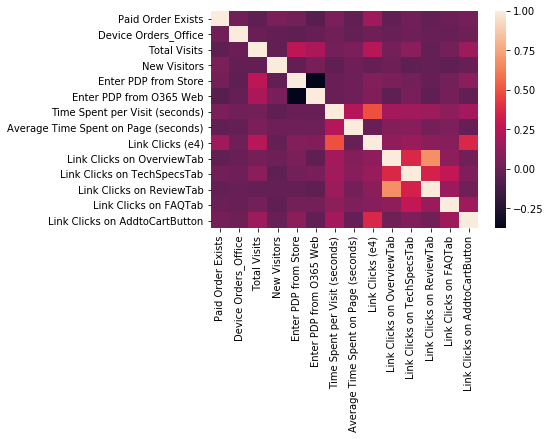

In [427]:
sns.heatmap(df_standard.corr())

In [428]:
df_standard.isnull().sum()

Paid Order Exists                       0
Device Orders_Office                    0
Total Visits                            0
New Visitors                            0
Enter PDP from Store                    0
Enter PDP from O365 Web                 0
Time Spent per Visit (seconds)          0
Average Time Spent on Page (seconds)    0
Link Clicks (e4)                        0
Link Clicks on OverviewTab              0
Link Clicks on TechSpecsTab             0
Link Clicks on ReviewTab                0
Link Clicks on FAQTab                   0
Link Clicks on AddtoCartButton          0
dtype: int64

In [429]:
## Apply PCA
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.90)
pca.fit(df_standard)
df_standard = pca.transform(df_standard)

In [430]:
pca.explained_variance_

array([2.38727392, 1.61454266, 1.39406377, 1.17660752, 1.09035886,
       1.05096749, 0.99877239, 0.96503348, 0.90367725, 0.69337994,
       0.61715319])

In [431]:
df_standard

array([[-2.35422516e-01,  7.40758111e-01,  5.12620436e-01, ...,
         5.93503403e+00, -1.92337085e-01, -1.23252371e+00],
       [ 1.07800844e+00,  1.78939102e+00,  1.69995000e+00, ...,
        -1.13902705e-01, -9.70444817e-02, -1.22522700e+00],
       [ 2.15114808e+00,  2.70656836e+00,  5.74758786e-01, ...,
         3.37498092e-01, -1.15013258e+00, -1.24054023e+00],
       ...,
       [ 1.25278299e-17,  2.80834774e-17, -1.68092370e-17, ...,
        -3.90294525e-17, -5.43218986e-19, -1.39987770e-17],
       [ 1.25278299e-17,  2.80834774e-17, -1.68092370e-17, ...,
        -3.90294525e-17, -5.43218986e-19, -1.39987770e-17],
       [ 1.25278299e-17,  2.80834774e-17, -1.68092370e-17, ...,
        -3.90294525e-17, -5.43218986e-19, -1.39987770e-17]])

In [432]:
#df_standard.fillna(value=0,inplace=True)
#df_standard.isnull().sum()`

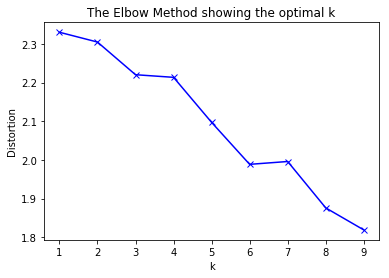

In [433]:
from sklearn import metrics
from scipy.spatial.distance import cdist

K = range(1,10)
distortions= []
for k in K:
    kmeansModel = KMeans(k)
    kmeansModel.fit(df_standard)
    distortions.append(sum(np.min(cdist(df_standard, kmeansModel.cluster_centers_, 'euclidean'), axis=1)) / df_standard.shape[0])

    # Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [434]:
distortions

[2.3301664795207553,
 2.30479491109626,
 2.2203348076247202,
 2.2135739919323782,
 2.097117478179527,
 1.9885730303635112,
 1.9959164503895213,
 1.8759757128698082,
 1.8190058292765818]

In [436]:
#K means Clustering 
def doKmeans(X, nclust=8):
    model = KMeans(n_clusters=nclust,init='k-means++', max_iter=300, n_init=10, random_state=0)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    print (model.inertia_, model.score)
    return (clust_labels, cent)

#k=7
clust_labels, cent = doKmeans(df_standard, 8)
kmeans8 = pd.DataFrame(clust_labels)
#df_standard.insert((df_standard.shape[1]),'kmeans5',kmeans5)

15426.200769797366 <bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)>


In [437]:
#df_standard.head()

In [25]:
d = ss.inverse_transform(df_prep2)
d

array([[ 1.38777878e-17,  0.00000000e+00,  3.00000000e+00, ...,
         0.00000000e+00, -2.77555756e-17,  0.00000000e+00],
       [ 1.38777878e-17,  0.00000000e+00,  2.00000000e+00, ...,
         0.00000000e+00, -2.77555756e-17,  0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         0.00000000e+00, -2.77555756e-17,  0.00000000e+00],
       ...,
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan]])

In [438]:
df_prep1['kmeans8'] = kmeans8 #df_standard['kmeans']
#df_prep1['kmeans5'] = kmeans5
df_prep1.head()

Paid Order Exists  Device Orders_Office  Total Visits  New Visitors  \
1                0.0                   2.0           2.0           1.0   
2                1.0                   1.0           1.0           0.0   
3                1.0                   1.0           1.0           0.0   
4                1.0                   1.0           1.0           0.0   
5                0.0                   1.0           1.0           1.0   

   Enter PDP from Store  Enter PDP from O365 Web  \
1                   0.0                      0.0   
2                   0.0                      1.0   
3                   0.0                      0.0   
4                   0.0                      0.0   
5                   0.0                      0.0   

   Time Spent per Visit (seconds)  Average Time Spent on Page (seconds)  \
1                      540.500000                             17.000000   
2                     1514.000000                             28.500000   
3                     2544.000000                             21.000000   
4                      865.000000                            103.521685   
5                      457.773055                            103.521685   

   Link Clicks (e4)  Link Clicks on OverviewTab  Link Clicks on TechSpecsTab  \
1               7.0                         0.0                          0.0   
2              76.0                         0.0                          0.0   
3             114.0                         0.0                          0.0   
4              34.0                         0.0                          0.0   
5               1.0                         0.0                          0.0   

   Link Clicks on ReviewTab  Link Clicks on FAQTab  \
1                       0.0                    0.0   
2                       0.0                    0.0   
3                       0.0                    0.0   
4                       0.0                    0.0   
5                       0.0                    0.0   

   Link Clicks on AddtoCartButton  kmeans8  
1                             0.0      2.0  
2                             0.0      2.0  
3                             0.0      2.0  
4                             0.0      2.0  
5                             0.0      2.0

In [439]:
df_prep1.kmeans8.value_counts()

0.0    1701
7.0     334
4.0     170
6.0      89
5.0      27
3.0      25
2.0      14
1.0       9
Name: kmeans8, dtype: int64

In [440]:
K


range(1, 10)

In [441]:
df_result = df_prep1[df_prep1['kmeans8']==0].describe()[1:2]
for k in range(1,8):
    df_k = df_prep1[df_prep1['kmeans8']==k].describe()[1:2]
    #print (df_k1)
    df_result = df_result.append(df_k, ignore_index = True)

df_result


Paid Order Exists  Device Orders_Office  Total Visits  New Visitors  \
0           0.036246              0.003169      1.072591      0.428749   
1           0.000000              0.000000      1.111111      0.555556   
2           0.214286              1.071429      1.071429      0.357143   
3           0.120000              0.040000      1.320000      0.400000   
4           1.000000              0.000000      1.047059      0.611765   
5           0.074074              0.000000      1.148148      0.481481   
6           0.056180              0.000000      2.269663      0.460674   
7           0.000000              0.000000      1.134731      0.982036   

   Enter PDP from Store  Enter PDP from O365 Web  \
0              0.350398                 0.298218   
1              0.555556                 0.111111   
2              0.142857                 0.357143   
3              0.280000                 0.600000   
4              0.370588                 0.282353   
5              0.148148                 0.666667   
6              0.752809                 0.606742   
7              0.041916                 0.973054   

   Time Spent per Visit (seconds)  Average Time Spent on Page (seconds)  \
0                      433.930796                            100.936443   
1                     1180.808117                             92.845381   
2                      638.019504                             72.905249   
3                      556.387944                             88.459613   
4                      525.192345                             91.001757   
5                     1251.141451                            212.685564   
6                      720.574129                            146.611558   
7                      376.300071                            105.452013   

   Link Clicks (e4)  Link Clicks on OverviewTab  Link Clicks on TechSpecsTab  \
0         18.741397                    0.011796                     0.028338   
1         36.000000                    0.000000                     0.111111   
2         27.642857                    0.000000                     0.071429   
3         24.160000                    0.000000                     0.000000   
4         34.600000                    0.000000                     0.023529   
5         45.037037                    0.037037                     0.074074   
6         47.617978                    0.011236                     0.112360   
7         17.622754                    0.005988                     0.029940   

   Link Clicks on ReviewTab  Link Clicks on FAQTab  \
0                  0.017885               0.016518   
1                  0.000000               0.000000   
2                  0.000000               0.000000   
3                  0.000000               0.000000   
4                  0.005882               0.017647   
5                  0.000000               0.000000   
6                  0.000000               0.011236   
7                  0.005988               0.011976   

   Link Clicks on AddtoCartButton  kmeans8  
0                        0.190428      0.0  
1                        0.222222      1.0  
2                        0.285714      2.0  
3                        0.120000      3.0  
4                        0.270588      4.0  
5                        0.148148      5.0  
6                        0.651685      6.0  
7                        0.080838      7.0

In [30]:
df_result.to_csv("Clustering_result.csv")

In [34]:
df.shape

(2383, 20)

In [381]:
cols = df_prep1.columns

In [231]:
print (range(df_prep1.shape[1]))

range(0, 18)


In [163]:
df.fillna(df.mean(), inplace=True)

In [164]:
df.head()

MC1ID  Paid Order Exists  Try Exists  \
0  50637eab03a94c59bb460e2e89adf021                0.0         0.0   
1  0ae3949b44364d0d9686d8022b3229f4                0.0         0.0   
2  bb7e2062bd4142a194eaa8818bf04169                1.0         0.0   
3  c3d457532b31409da308173a867c96b5                1.0         0.0   
4  0bc59fdb65094105bb31a39094df49d4                1.0         0.0   

   Device Orders_Office  Total Visits  New Visitors  Return Visitors  \
0                   3.0           3.0           0.0              1.0   
1                   2.0           2.0           1.0              0.0   
2                   1.0           1.0           0.0              1.0   
3                   1.0           1.0           0.0              1.0   
4                   1.0           1.0           0.0              1.0   

   Enter PDP from Office.com  Enter PDP from Store  Enter PDP from O365 Web  \
0                        0.0                   0.0                      0.0   
1                        0.0                   0.0                      0.0   
2                        0.0                   0.0                      1.0   
3                        0.0                   0.0                      0.0   
4                        0.0                   0.0                      0.0   

    ...     Average Time Spent on Page (seconds)  Link Clicks (e4)  \
0   ...                               106.550429             145.0   
1   ...                                17.000000               7.0   
2   ...                                28.500000              76.0   
3   ...                                21.000000             114.0   
4   ...                               106.550429              34.0   

   Link Clicks on OverviewTab  Link Clicks on TechSpecsTab  \
0                         0.0                          4.0   
1                         0.0                          0.0   
2                         0.0                          0.0   
3                         0.0                          0.0   
4                         0.0                          0.0   

   Link Clicks on ReviewTab  Link Clicks on FAQTab  \
0                       4.0                    0.0   
1                       0.0                    0.0   
2                       0.0                    0.0   
3                       0.0                    0.0   
4                       0.0                    0.0   

   Link Clicks on AddtoCartButton  Link Clicks on Trial link  kmeans5  kmeans9  
0                             0.0                        0.0        3        7  
1                             0.0                        0.0        1        6  
2                             0.0                        0.0        1        6  
3                             0.0                        0.0        1        6  
4                             0.0                        2.0        1        6  

[5 rows x 21 columns]

In [148]:
np.max(df.iloc[:,1])

1.0

In [442]:
df_prep1.columns

Index(['Paid Order Exists', 'Device Orders_Office', 'Total Visits',
       'New Visitors', 'Enter PDP from Store', 'Enter PDP from O365 Web',
       'Time Spent per Visit (seconds)',
       'Average Time Spent on Page (seconds)', 'Link Clicks (e4)',
       'Link Clicks on OverviewTab', 'Link Clicks on TechSpecsTab',
       'Link Clicks on ReviewTab', 'Link Clicks on FAQTab',
       'Link Clicks on AddtoCartButton', 'kmeans8'],
      dtype='object')

In [443]:
df_standard = pca.inverse_transform(df_standard)

In [444]:
df_standard.shape

(2376, 14)

In [445]:
df_standard_transform = pd.DataFrame(data= df_standard, columns=df_prep1.columns[:-1])
df_standard_transform['kmeans8'] = kmeans8
#df_standard_transform['kmeans5'] = kmeans5
df_standard_transform.head()

Paid Order Exists  Device Orders_Office  Total Visits  New Visitors  \
0          -0.440539             23.021527      1.511297      1.057696   
1           3.400436             11.381407      0.233506     -1.161224   
2           3.421791             11.438681     -0.383069     -1.213430   
3           3.397645             11.442529     -0.425841     -1.216081   
4          -0.399034             11.447242     -0.484214      1.094572   

   Enter PDP from Store  Enter PDP from O365 Web  \
0             -0.117221                -0.306406   
1             -1.362599                 0.617557   
2             -0.604333                -0.767491   
3             -0.599799                -0.772801   
4             -0.526995                -0.693956   

   Time Spent per Visit (seconds)  Average Time Spent on Page (seconds)  \
0                       -0.106389                             -0.598993   
1                        1.638231                             -0.629281   
2                        3.352603                             -0.694724   
3                        0.581565                              0.034758   
4                       -0.032846                              0.020394   

   Link Clicks (e4)  Link Clicks on OverviewTab  Link Clicks on TechSpecsTab  \
0         -0.188309                    0.019810                    -0.143556   
1          1.889809                   -0.183623                    -0.187724   
2          3.101118                   -0.141720                    -0.153886   
3          0.512935                   -0.145365                    -0.154222   
4         -0.646221                   -0.073582                    -0.155327   

   Link Clicks on ReviewTab  Link Clicks on FAQTab  \
0                 -0.217546              -0.171614   
1                 -0.053329              -0.026562   
2                 -0.075037              -0.139995   
3                 -0.070971              -0.130547   
4                 -0.138531              -0.138772   

   Link Clicks on AddtoCartButton  kmeans8  
0                       -0.285342        2  
1                       -0.365648        2  
2                       -0.249532        2  
3                       -0.286591        2  
4                       -0.265549        2

In [448]:
np.min(df_standard_transform['Link Clicks on AddtoCartButton'])

-1.5706063466431053

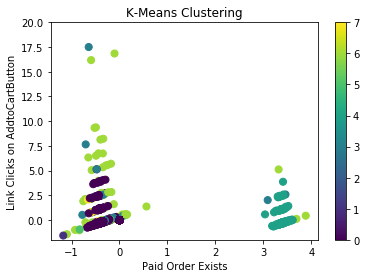

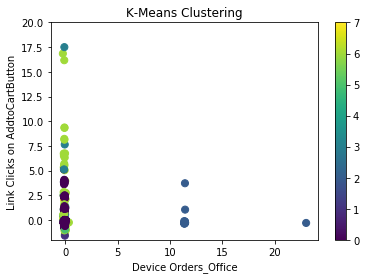

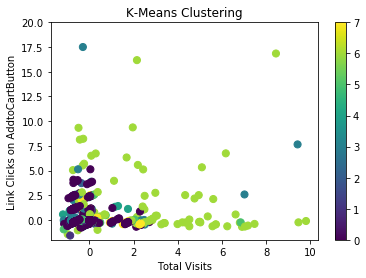

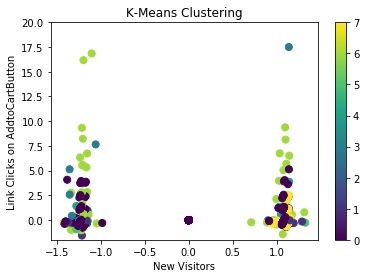

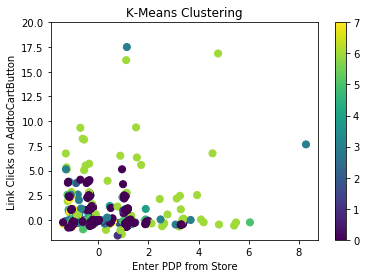

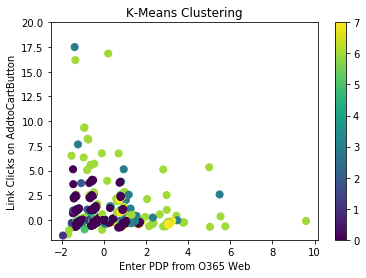

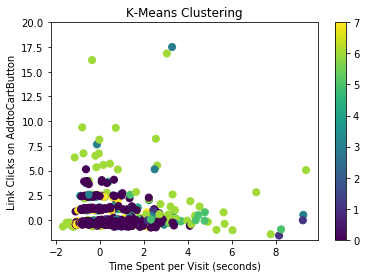

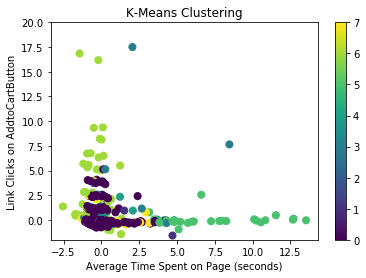

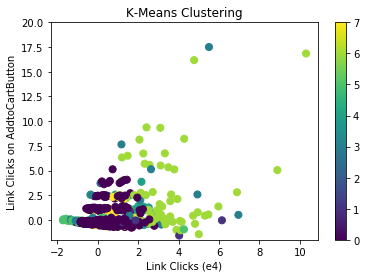

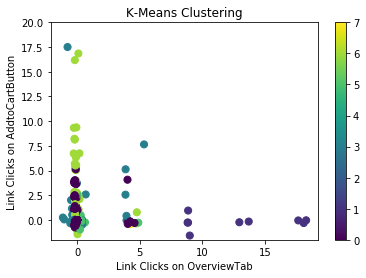

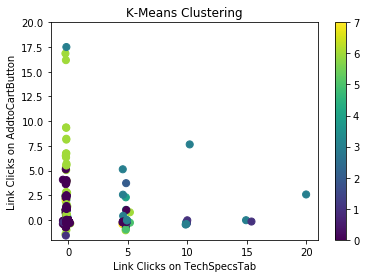

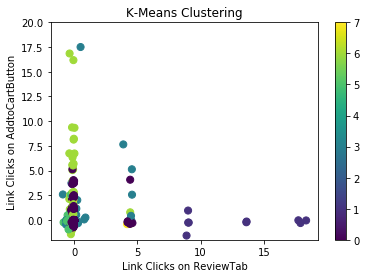

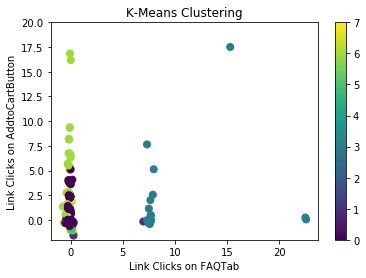

In [449]:
for cc in range(0,14):
    if np.max(df_standard_transform.iloc[:,cc])==1 and np.min(df_standard_transform.iloc[:,cc])==0 :
        continue
    
    for r in range(0,14):
        if cols[r] !='Link Clicks on AddtoCartButton':
            continue
        if cc == r:
            #print ("same")
            continue
        elif np.max(df_standard_transform.iloc[:,r])==1 and np.min(df_standard_transform.iloc[:,r])==0 :
            continue
        #print (cc ,",", r)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        scatter = ax.scatter(df_standard_transform.iloc[:,cc],df_standard_transform.iloc[:,r],
                     c=df_standard_transform['kmeans8'],s=50)
        plt.ylim(-2, 20)
        ax.set_title('K-Means Clustering')
        ax.set_xlabel(cols[cc])
        ax.set_ylabel(cols[r])
        plt.colorbar(scatter)

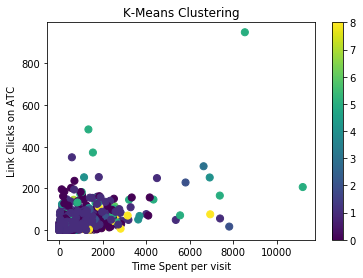

In [132]:
#Plot the clusters obtained using k means`
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df['Time Spent per Visit (seconds)'],df['Link Clicks (e4)'],
                     c=df['kmeans9'],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Time Spent per visit')
ax.set_ylabel('Link Clicks on ATC')
plt.colorbar(scatter)

## --- END --- 

In [39]:
#K means Clustering 
def doKmeans(X, nclust=4):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(df_standard, 4)
kmeans_4 = pd.DataFrame(clust_labels)
df_standard.insert((df_standard.shape[1]),'kmeans_4',kmeans_4)

In [40]:
df_standard.head()

Paid Order Exists  Try Exists  Device Orders_Office  Total Visits  \
0          -0.338617   -0.170054             24.356599      3.839983   
1          -0.338617   -0.170054             16.208726      1.783592   
2           2.953187   -0.170054              8.060853     -0.272798   
3           2.953187   -0.170054              8.060853     -0.272798   
4           2.953187   -0.170054              8.060853     -0.272798   

   New Visitors  Return Visitors  Enter PDP from Office.com  \
0     -1.040739         1.040739                  -0.245546   
1      0.960855        -0.960855                  -0.245546   
2     -1.040739         1.040739                  -0.245546   
3     -1.040739         1.040739                  -0.245546   
4     -1.040739         1.040739                  -0.245546   

   Enter PDP from Store  Enter PDP from O365 Web  \
0             -0.615528                -0.756132   
1             -0.615528                -0.756132   
2             -0.615528                 1.081517   
3             -0.615528                -0.756132   
4             -0.615528                -0.756132   

   Time Spent per Visit (seconds)  Average Time Spent on Page (seconds)  \
0                        0.218917                              0.000000   
1                        0.075876                             -0.374645   
2                        1.209529                             -0.326534   
3                        2.408976                             -0.357911   
4                        0.453761                              0.000000   

   Link Clicks (e4)  Link Clicks on OverviewTab  Link Clicks on TechSpecsTab  \
0          2.842625                   -0.083989                    12.178270   
1         -0.361259                   -0.083989                    -0.126227   
2          1.240683                   -0.083989                    -0.126227   
3          2.122911                   -0.083989                    -0.126227   
4          0.265587                   -0.083989                    -0.126227   

   Link Clicks on ReviewTab  Link Clicks on FAQTab  \
0                 23.647165              -0.097815   
1                 -0.103467              -0.097815   
2                 -0.103467              -0.097815   
3                 -0.103467              -0.097815   
4                 -0.103467              -0.097815   

   Link Clicks on AddtoCartButton  Link Clicks on Trial link  kmeans  kmeans_4  
0                       -0.161255                  -0.135679       2         2  
1                       -0.161255                  -0.135679       4         0  
2                       -0.161255                  -0.135679       0         1  
3                       -0.161255                  -0.135679       0         1  
4                       -0.161255                   1.457542       0         1

In [42]:
df['kmeans_4'] = df_standard['kmeans_4']
df.head()

MC1ID  Paid Order Exists  Try Exists  \
0  50637eab03a94c59bb460e2e89adf021                0.0         0.0   
1  0ae3949b44364d0d9686d8022b3229f4                0.0         0.0   
2  bb7e2062bd4142a194eaa8818bf04169                1.0         0.0   
3  c3d457532b31409da308173a867c96b5                1.0         0.0   
4  0bc59fdb65094105bb31a39094df49d4                1.0         0.0   

   Device Orders_Office  Total Visits  New Visitors  Return Visitors  \
0                   3.0           3.0           0.0              1.0   
1                   2.0           2.0           1.0              0.0   
2                   1.0           1.0           0.0              1.0   
3                   1.0           1.0           0.0              1.0   
4                   1.0           1.0           0.0              1.0   

   Enter PDP from Office.com  Enter PDP from Store  Enter PDP from O365 Web  \
0                        0.0                   0.0                      0.0   
1                        0.0                   0.0                      0.0   
2                        0.0                   0.0                      1.0   
3                        0.0                   0.0                      0.0   
4                        0.0                   0.0                      0.0   

     ...     Average Time Spent on Page (seconds)  Link Clicks (e4)  \
0    ...                                      NaN             145.0   
1    ...                                     17.0               7.0   
2    ...                                     28.5              76.0   
3    ...                                     21.0             114.0   
4    ...                                      NaN              34.0   

   Link Clicks on OverviewTab  Link Clicks on TechSpecsTab  \
0                         0.0                          4.0   
1                         0.0                          0.0   
2                         0.0                          0.0   
3                         0.0                          0.0   
4                         0.0                          0.0   

   Link Clicks on ReviewTab  Link Clicks on FAQTab  \
0                       4.0                    0.0   
1                       0.0                    0.0   
2                       0.0                    0.0   
3                       0.0                    0.0   
4                       0.0                    0.0   

   Link Clicks on AddtoCartButton  Link Clicks on Trial link  kmeans  kmeans_4  
0                             0.0                        0.0       2         2  
1                             0.0                        0.0       4         0  
2                             0.0                        0.0       0         1  
3                             0.0                        0.0       0         1  
4                             0.0                        2.0       0         1  

[5 rows x 21 columns]

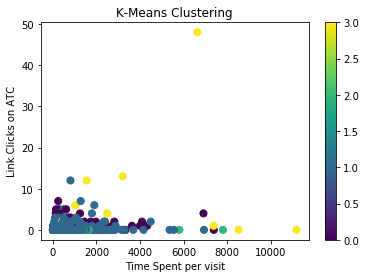

In [43]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df['Time Spent per Visit (seconds)'],df['Link Clicks on AddtoCartButton'],
                     c=df['kmeans_4'],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Time Spent per visit')
ax.set_ylabel('Link Clicks on ATC')
plt.colorbar(scatter)

##  Agglomertive

In [394]:
df_standard_transform.drop(['agglomerative'], axis= 1, inplace=True)

In [395]:
def doAgglomerative(X, nclust=5):
    model = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
    clust_labels1 = model.fit_predict(X)
    print (model.affinity, model.connectivity)
    return (clust_labels1)

clust_labels1 = doAgglomerative(df_standard, 5)
agglomerative = pd.DataFrame(clust_labels1)
df_standard_transform.insert((df_standard_transform.shape[1]),'agglomerative',agglomerative)
df_standard_transform.head()

euclidean None


Paid Order Exists  Device Orders_Office  Total Visits  New Visitors  \
0          -0.448514             23.026075      1.504168      1.057595   
1           3.391502             11.384401      0.217417     -1.164036   
2           3.411122             11.442985     -0.405026     -1.213913   
3           3.395876             11.445005     -0.429952     -1.215853   
4          -0.401818             11.449734     -0.486502      1.095283   

   Enter PDP from Store  Enter PDP from O365 Web  \
0             -0.137688                -0.325944   
1             -1.366950                 0.614182   
2             -0.602352                -0.769908   
3             -0.603855                -0.776356   
4             -0.532428                -0.700026   

   Time Spent per Visit (seconds)  Average Time Spent on Page (seconds)  \
0                       -0.174447                             -0.578220   
1                        1.567858                             -0.605751   
2                        3.226908                             -0.677377   
3                        0.546347                              0.042887   
4                       -0.051953                              0.026678   

   Link Clicks (e4)  Link Clicks on OverviewTab  Link Clicks on TechSpecsTab  \
0         -0.130664                    0.018621                    -0.142114   
1          1.894337                   -0.180973                    -0.189547   
2          3.101170                   -0.137371                    -0.154161   
3          0.515576                   -0.144328                    -0.153973   
4         -0.619778                   -0.074005                    -0.154984   

   Link Clicks on ReviewTab  Link Clicks on FAQTab  \
0                 -0.214363              -0.172324   
1                 -0.056831              -0.032773   
2                 -0.078673              -0.134101   
3                 -0.071462              -0.131365   
4                 -0.137567              -0.136942   

   Link Clicks on AddtoCartButton  kmeans8  agglomerative  
0                       -0.174230        3              2  
1                       -0.308826        3              2  
2                       -0.172101        3              2  
3                       -0.192699        3              2  
4                       -0.170478        3              2

In [396]:
df['agglomerative'] = df_standard['agglomerative']
df.head()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


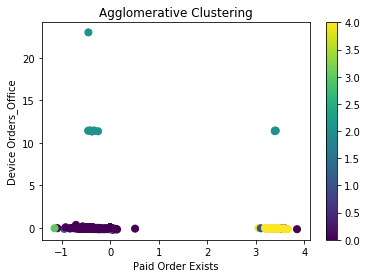

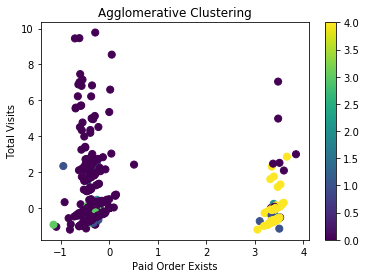

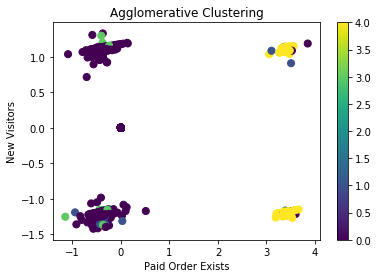

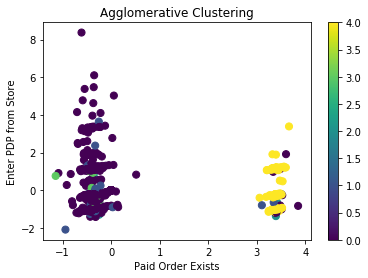

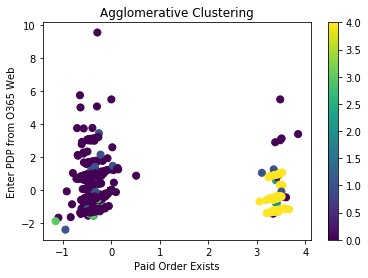

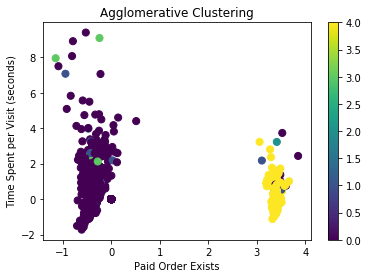

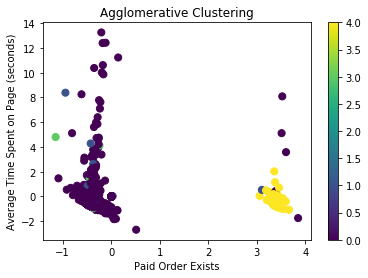

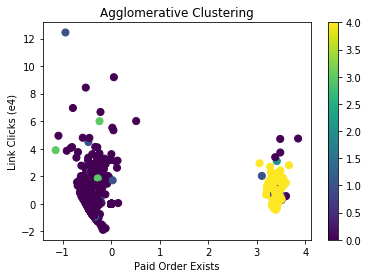

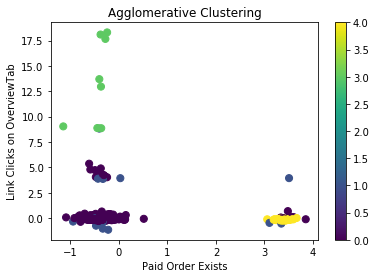

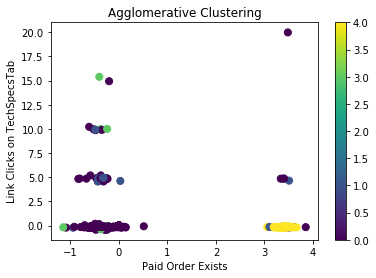

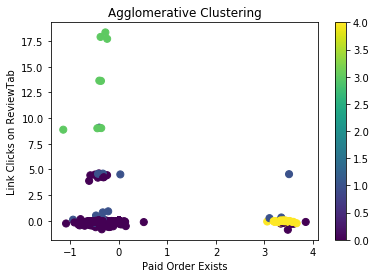

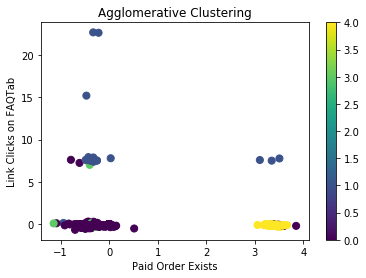

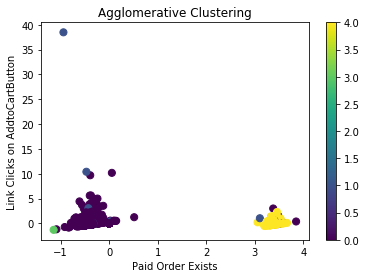

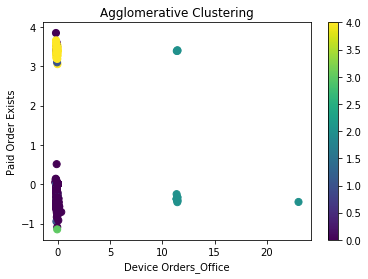

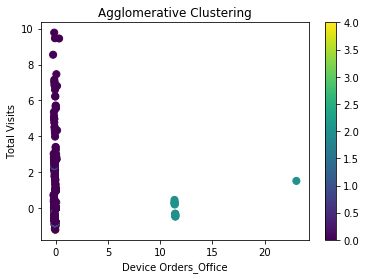

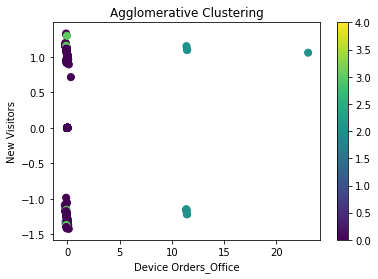

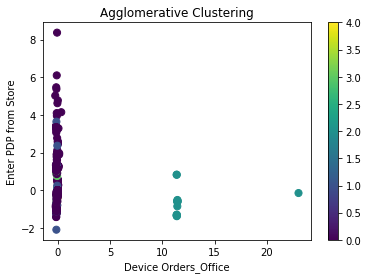

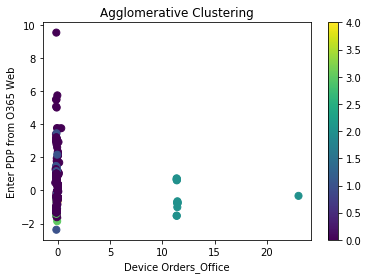

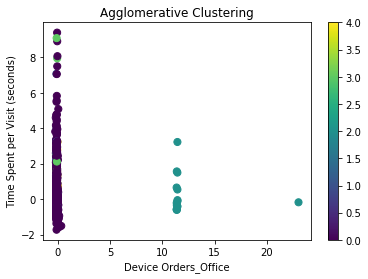

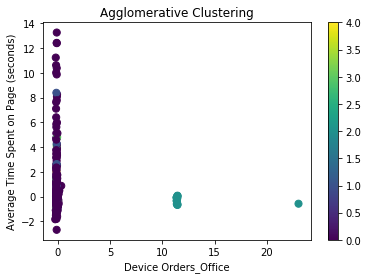

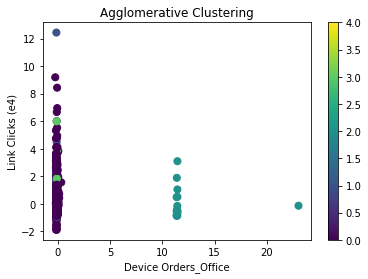

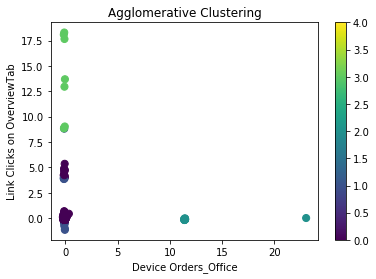

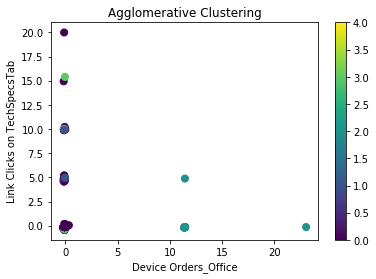

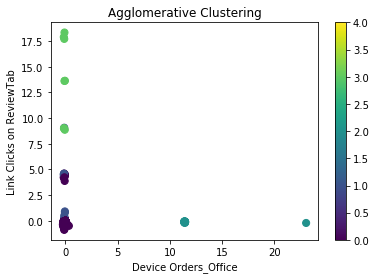

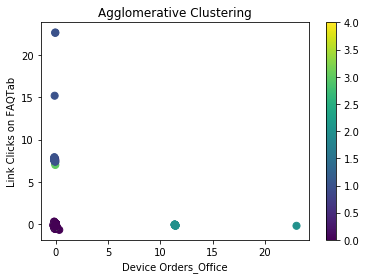

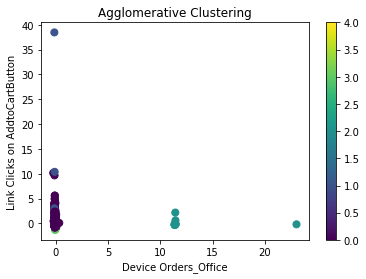

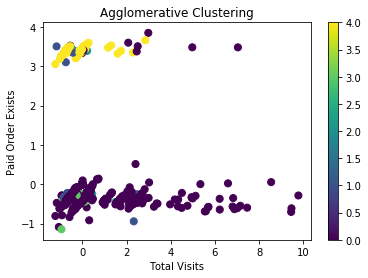

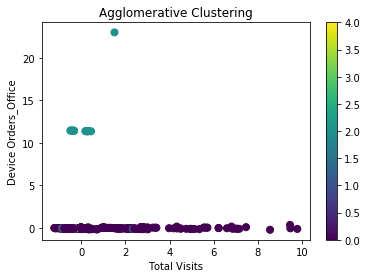

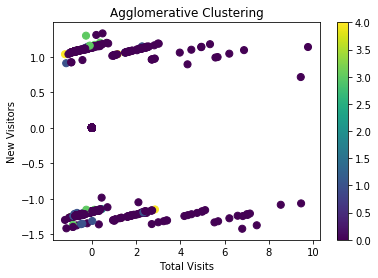

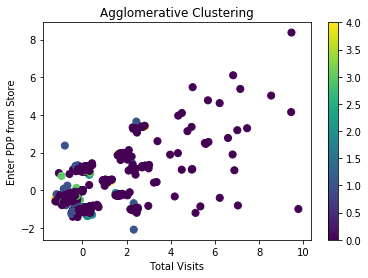

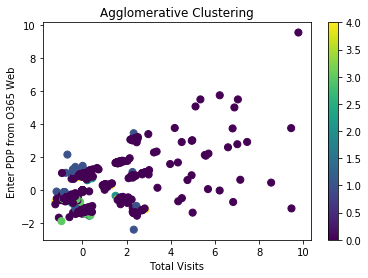

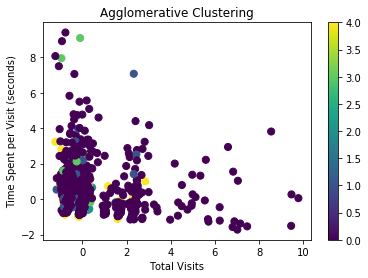

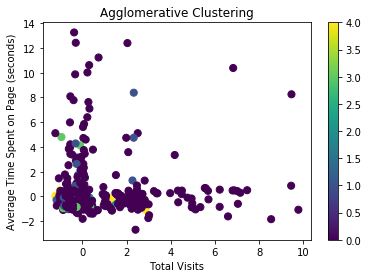

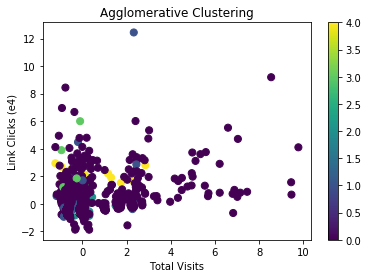

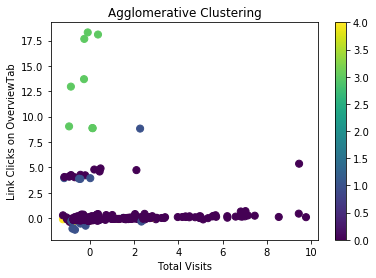

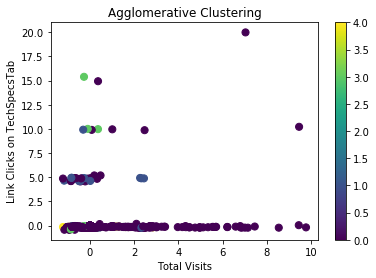

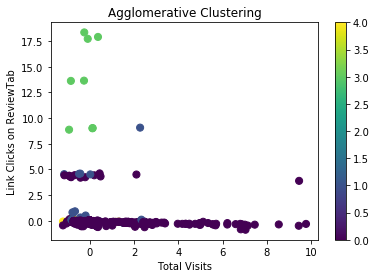

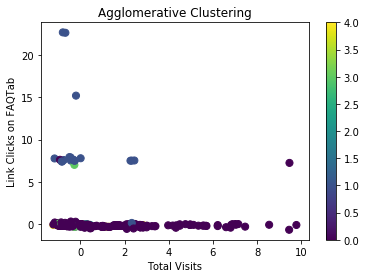

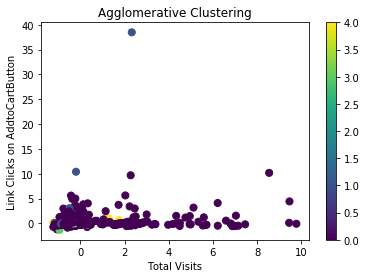

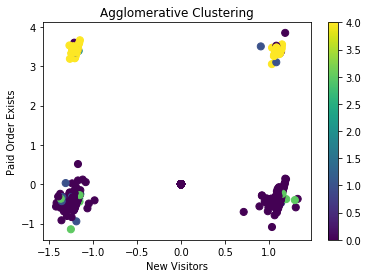

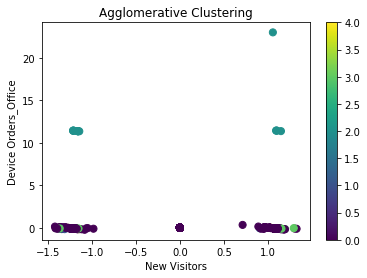

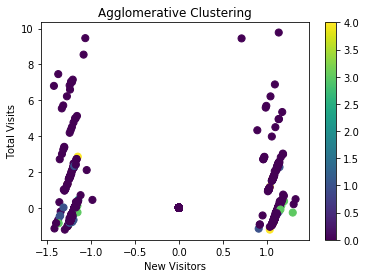

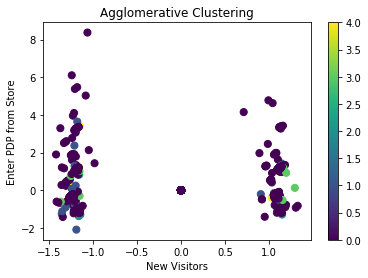

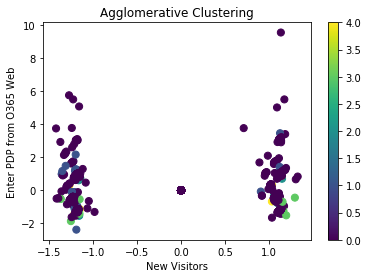

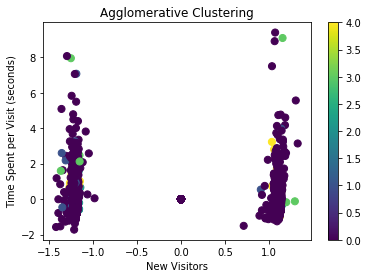

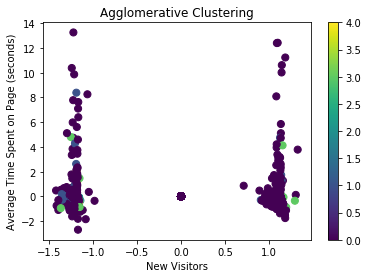

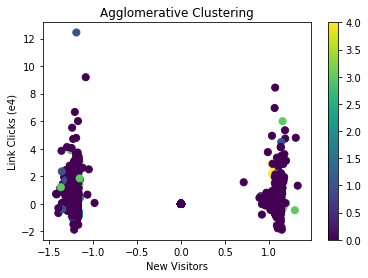

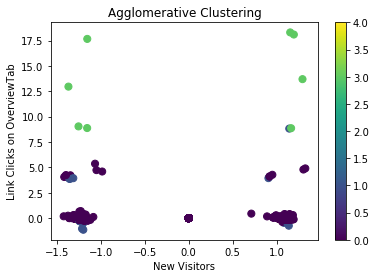

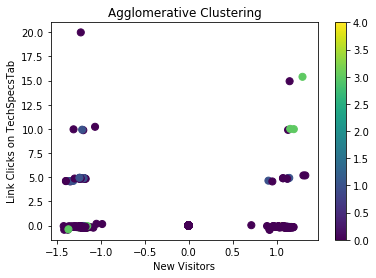

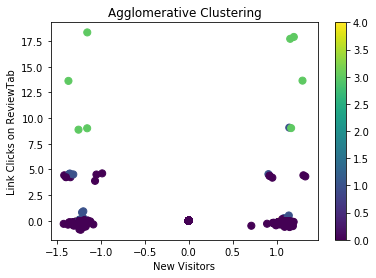

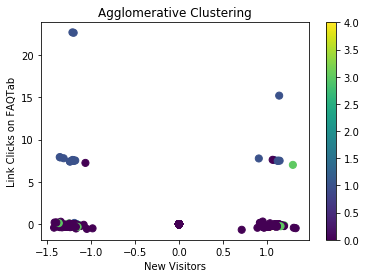

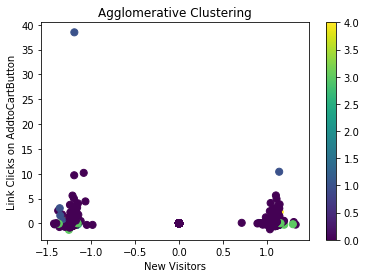

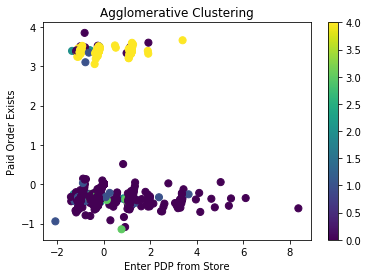

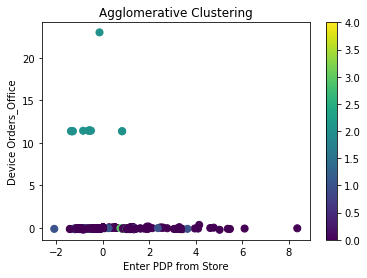

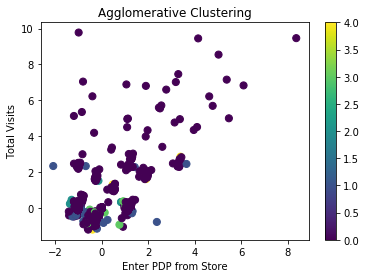

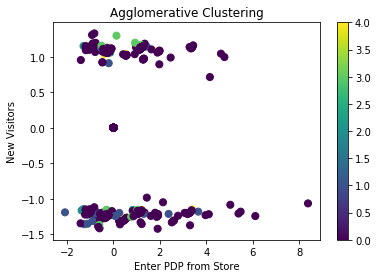

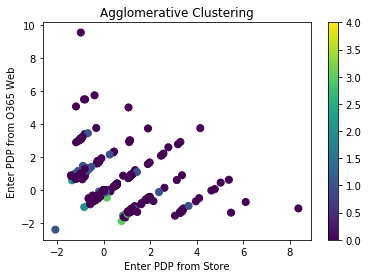

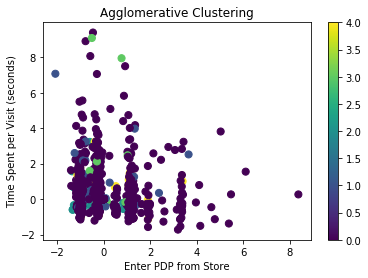

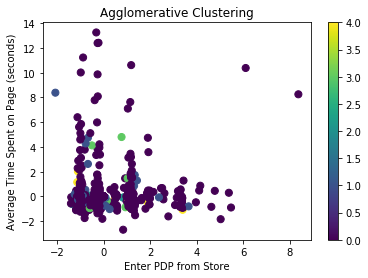

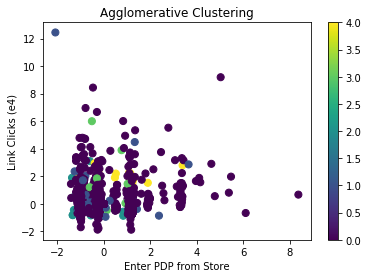

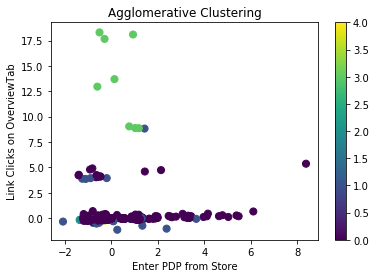

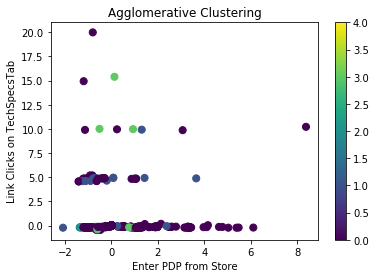

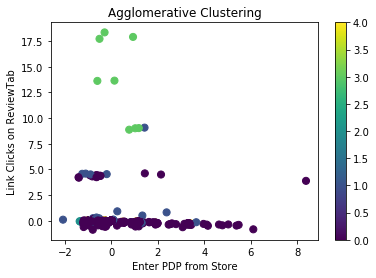

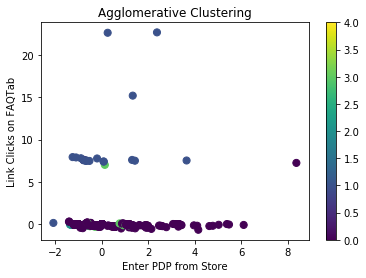

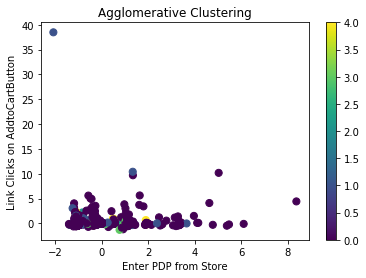

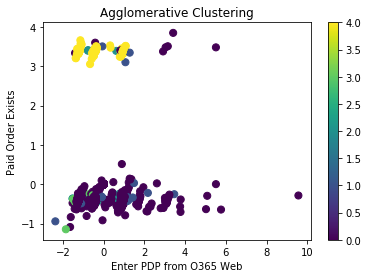

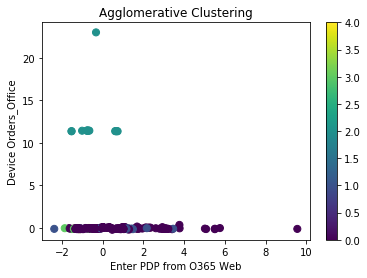

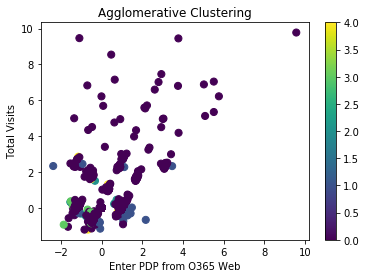

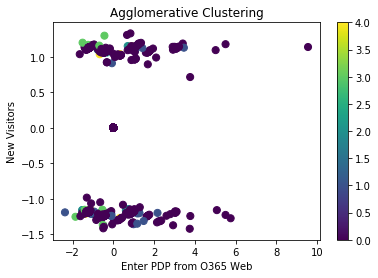

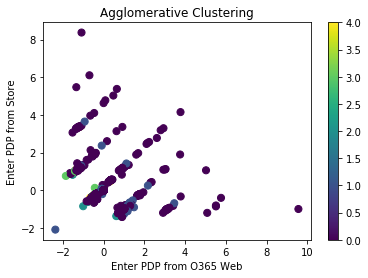

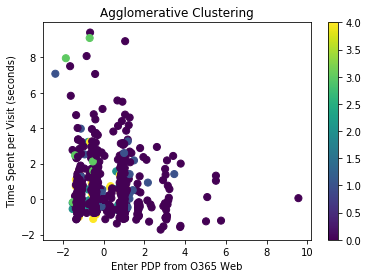

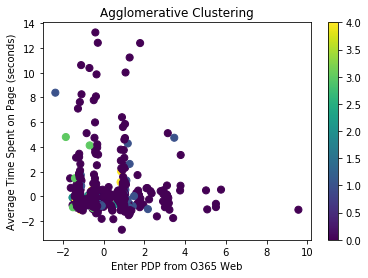

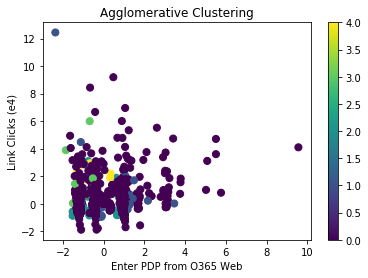

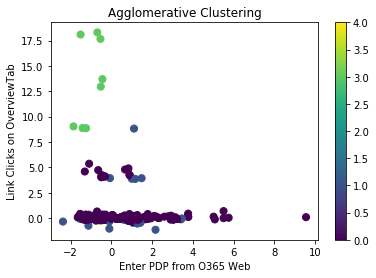

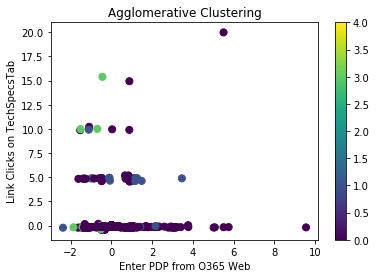

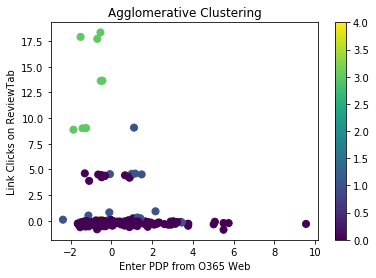

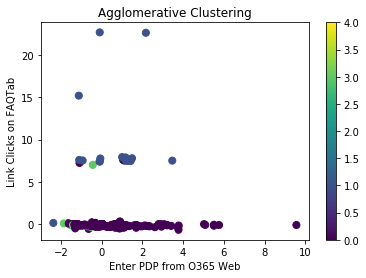

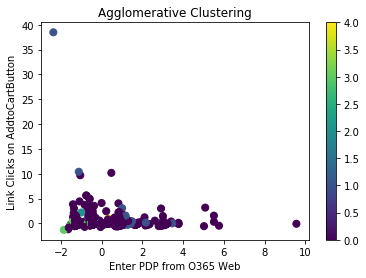

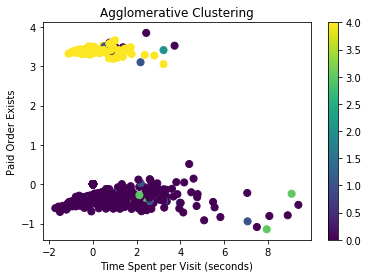

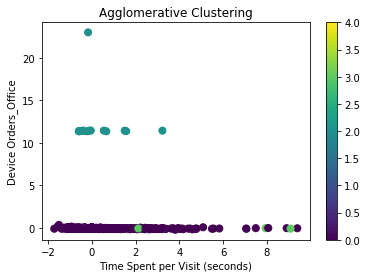

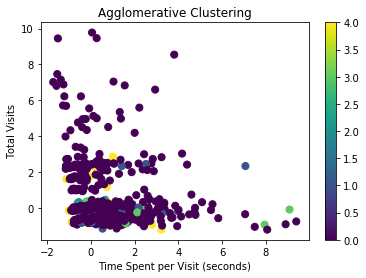

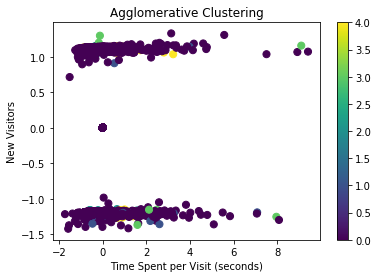

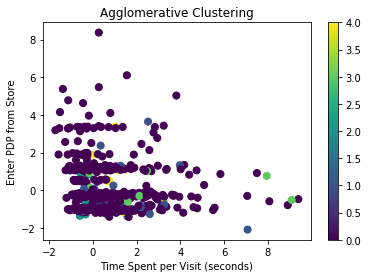

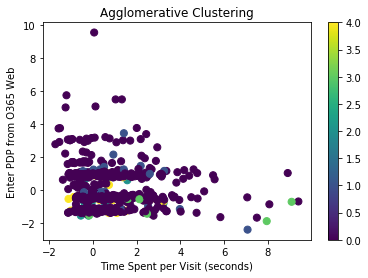

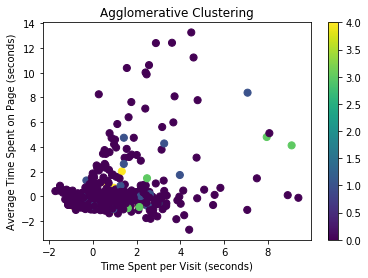

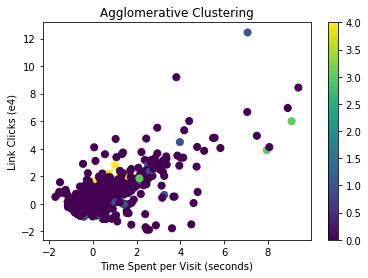

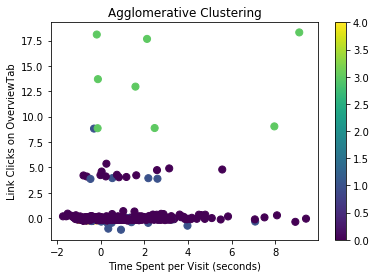

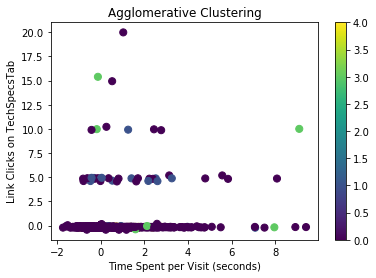

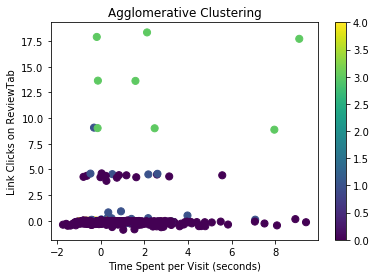

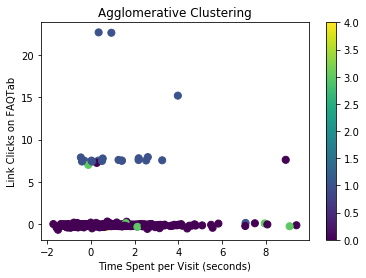

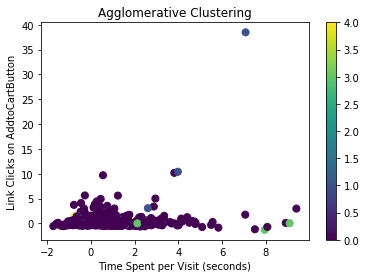

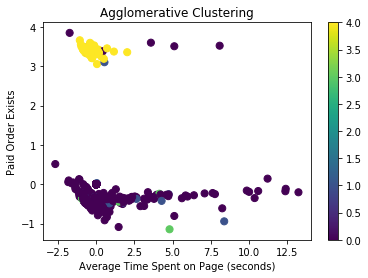

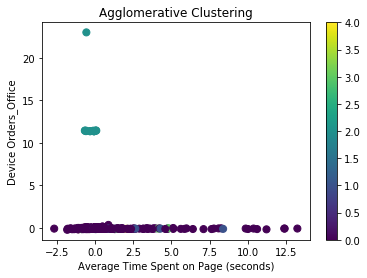

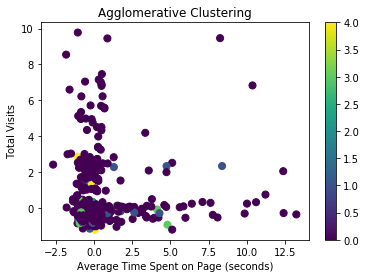

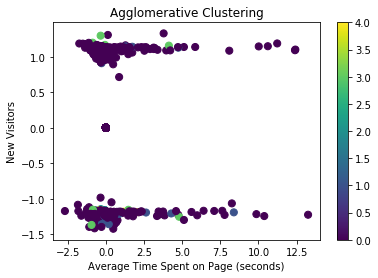

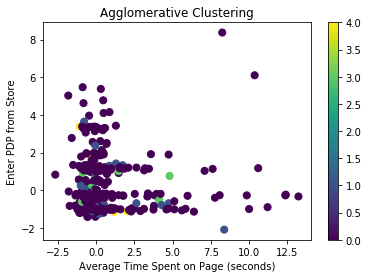

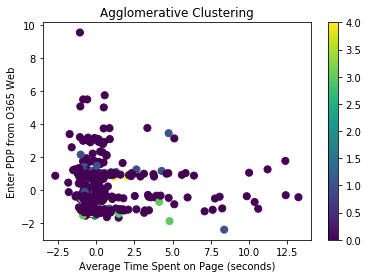

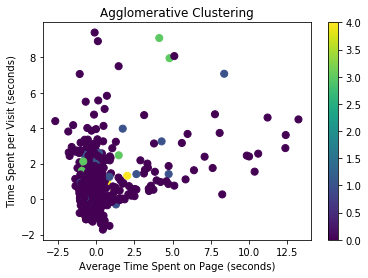

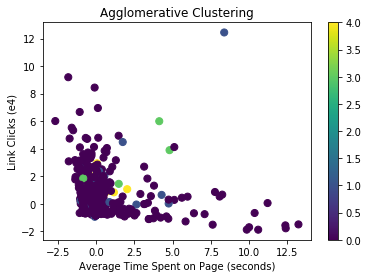

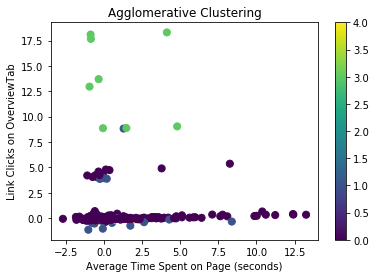

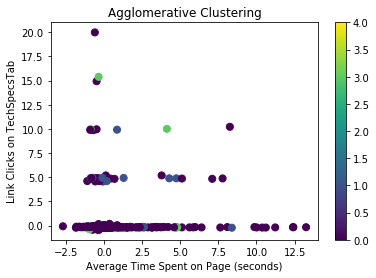

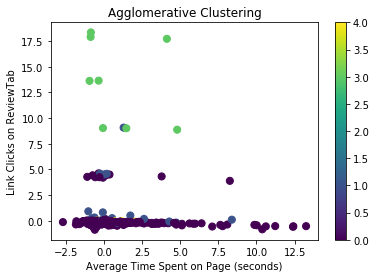

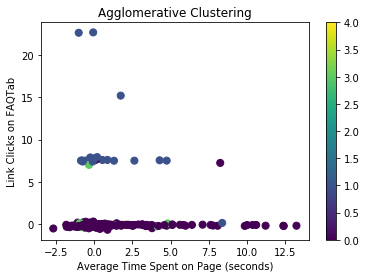

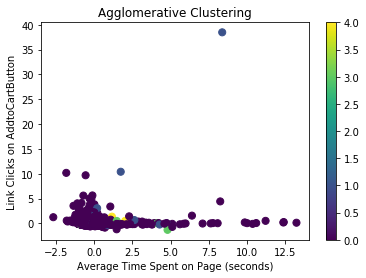

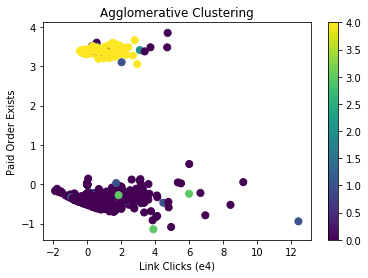

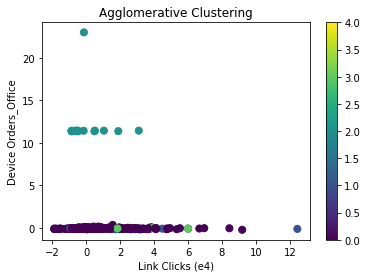

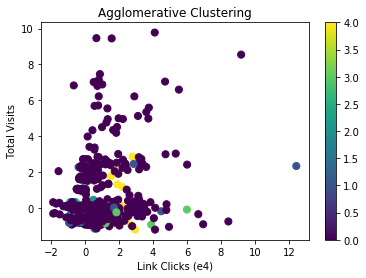

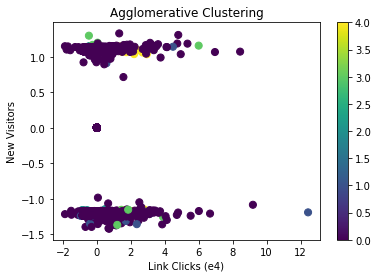

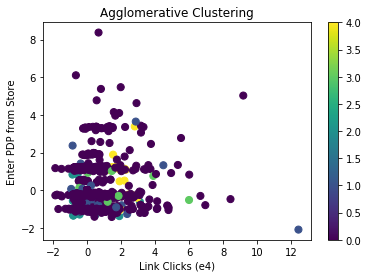

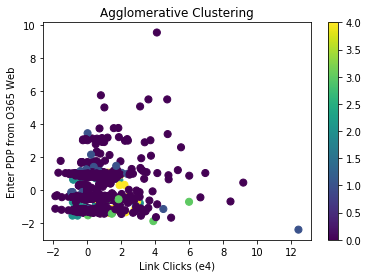

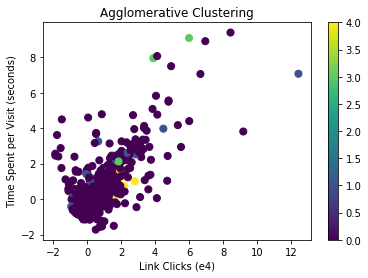

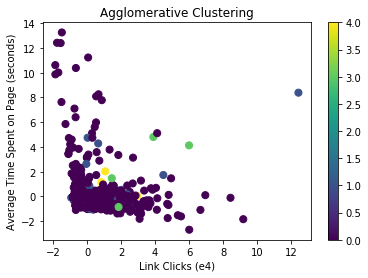

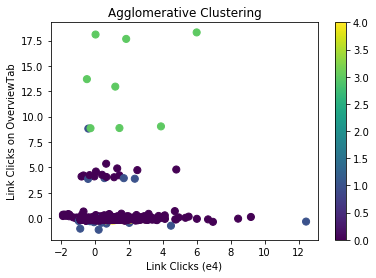

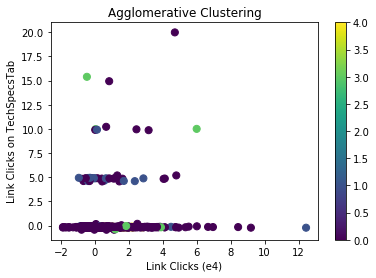

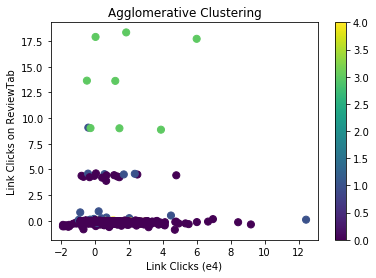

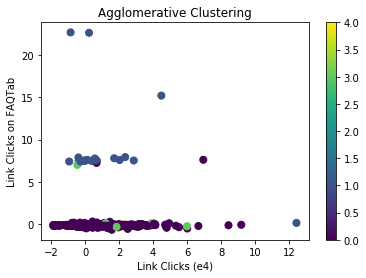

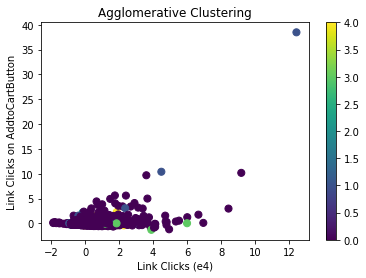

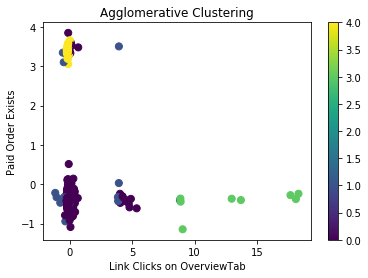

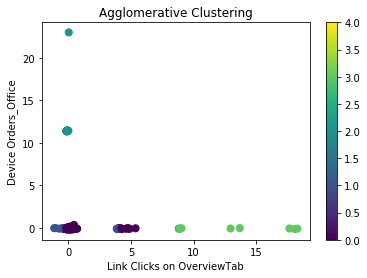

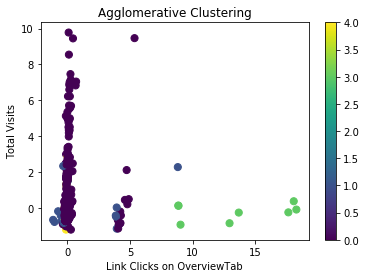

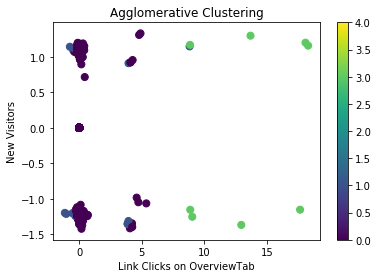

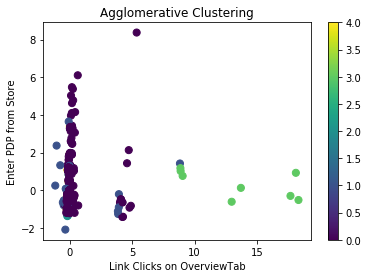

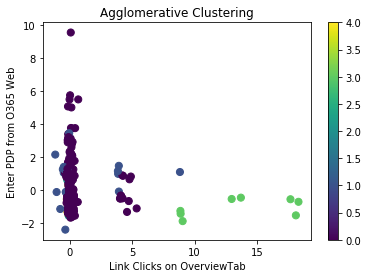

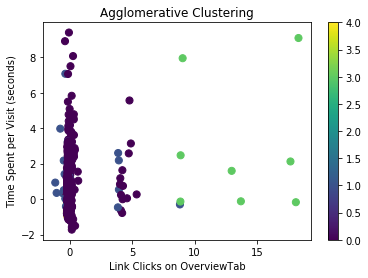

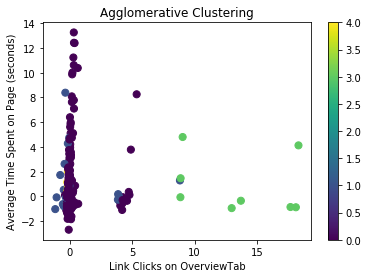

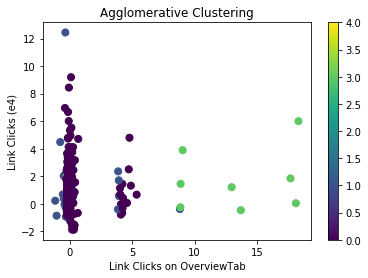

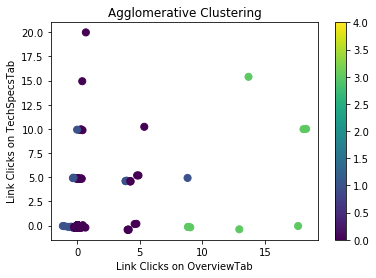

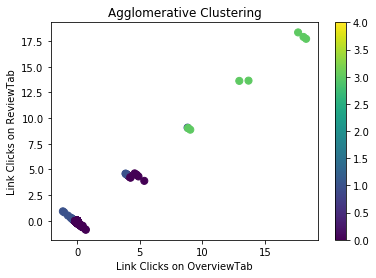

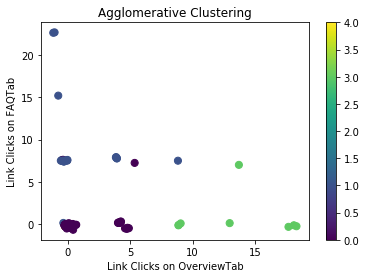

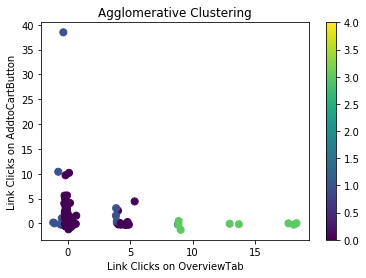

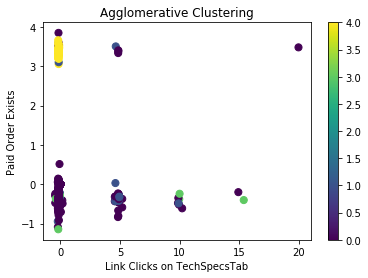

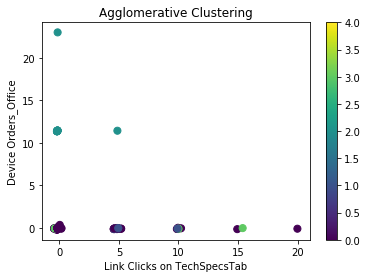

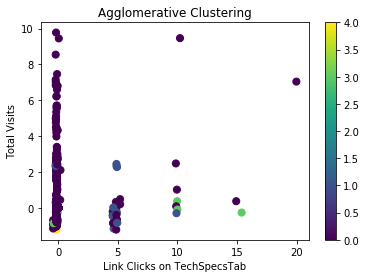

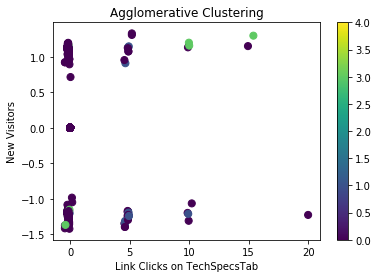

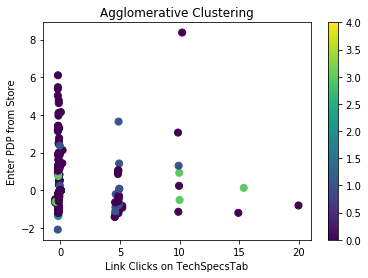

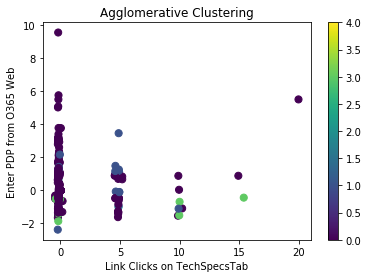

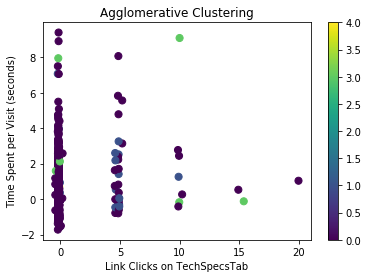

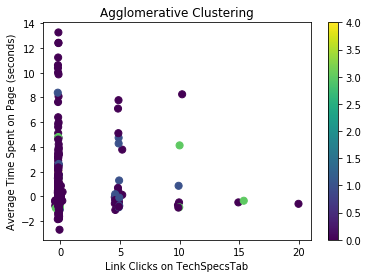

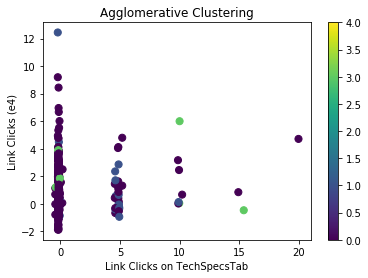

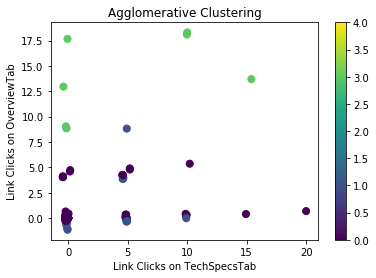

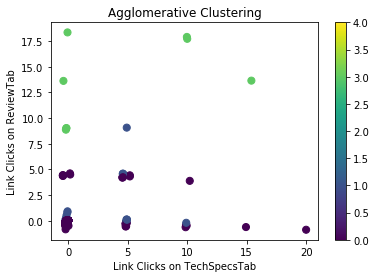

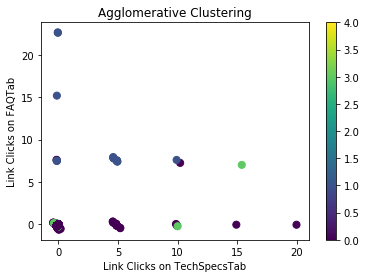

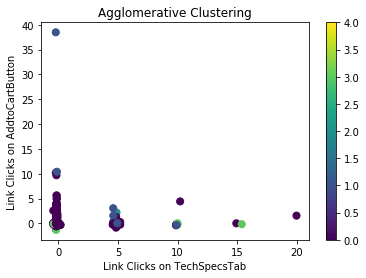

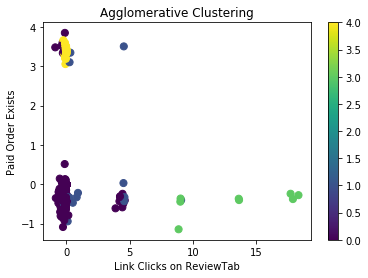

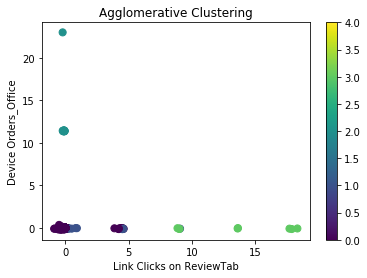

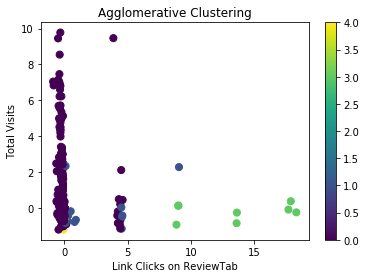

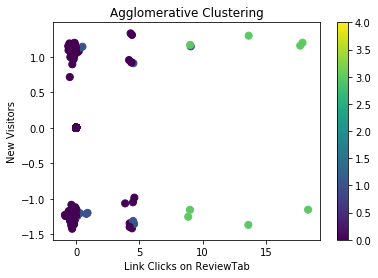

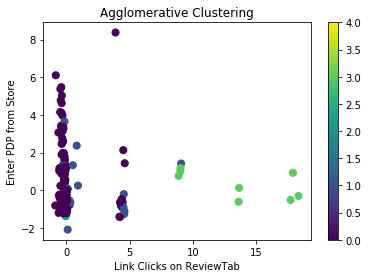

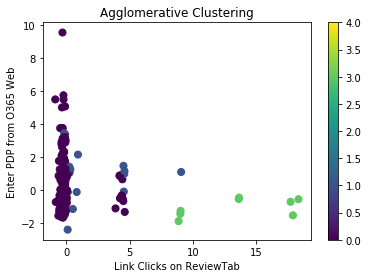

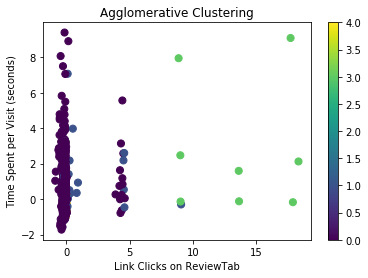

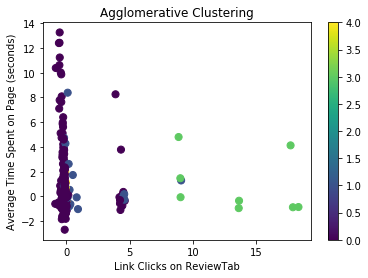

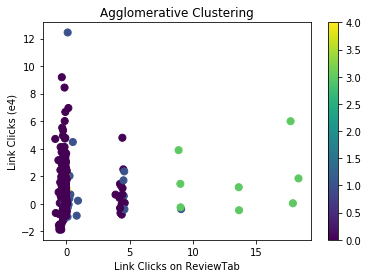

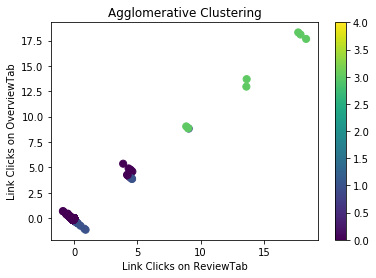

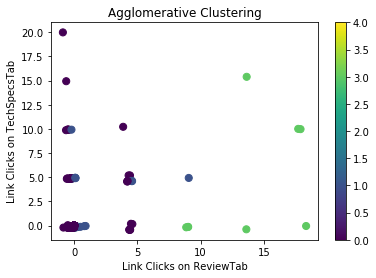

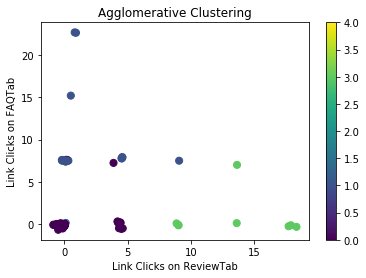

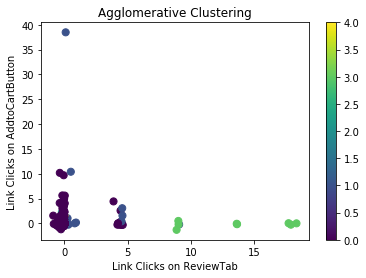

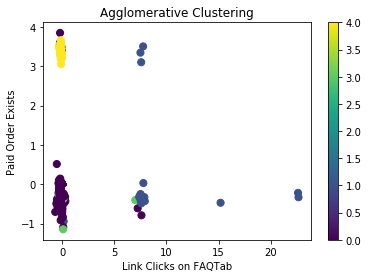

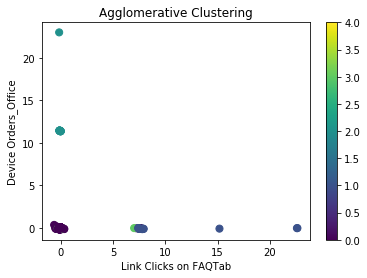

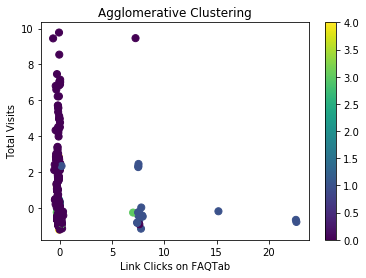

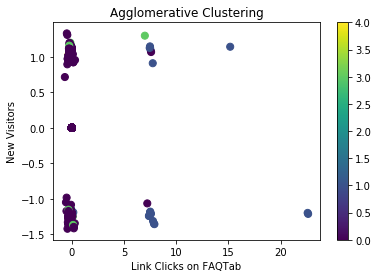

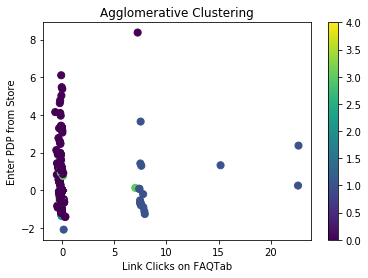

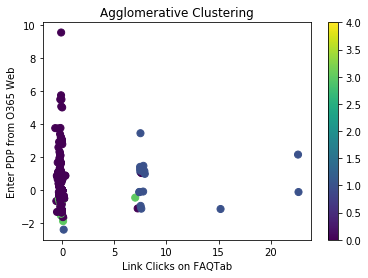

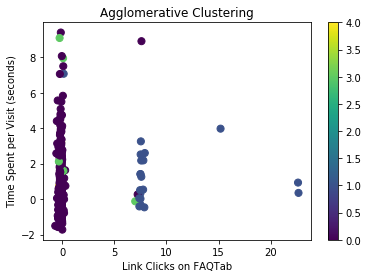

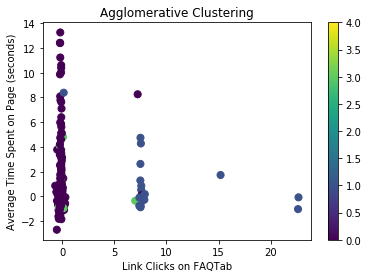

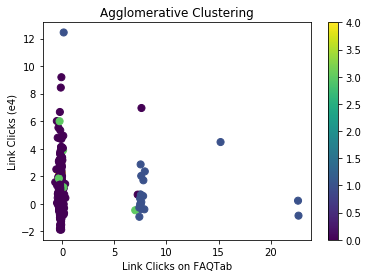

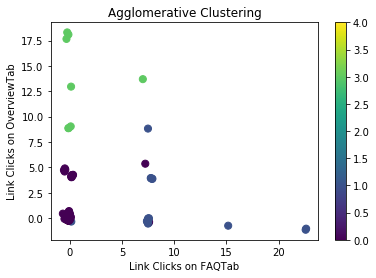

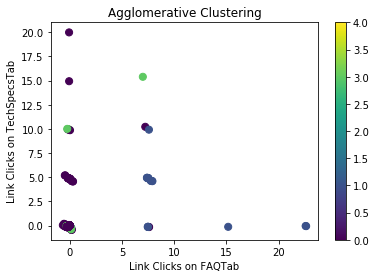

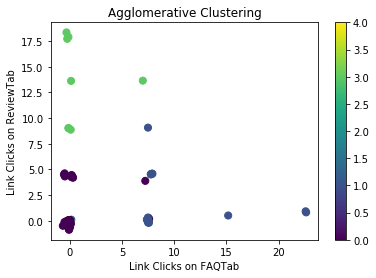

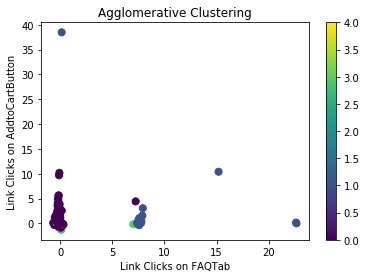

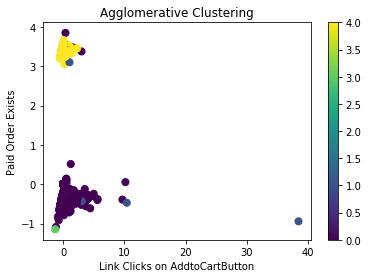

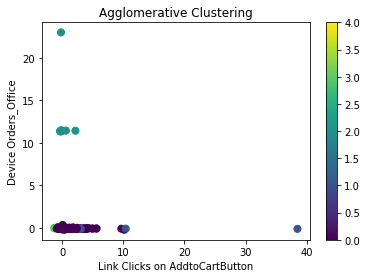

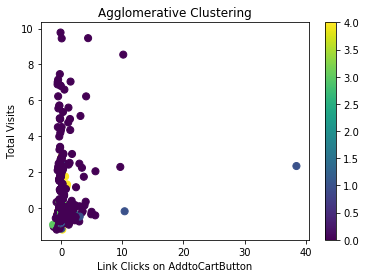

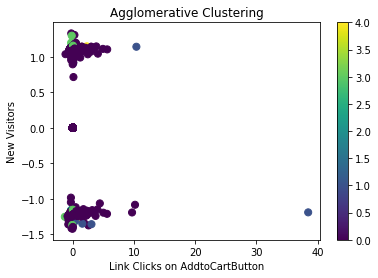

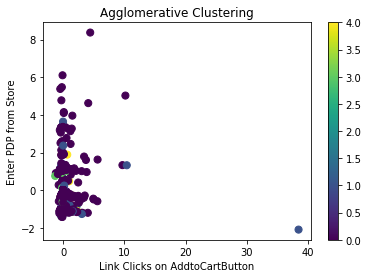

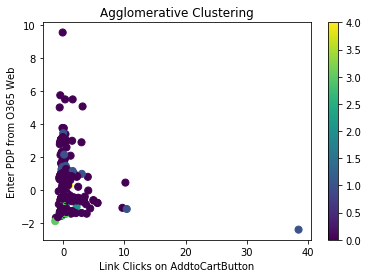

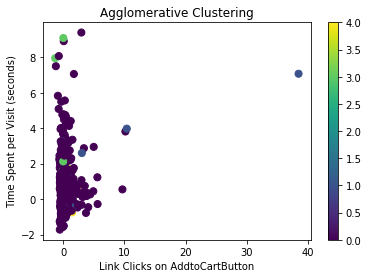

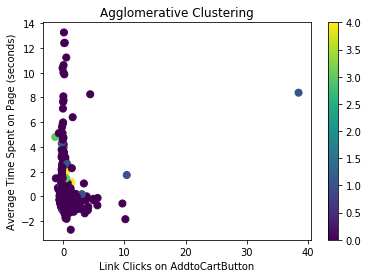

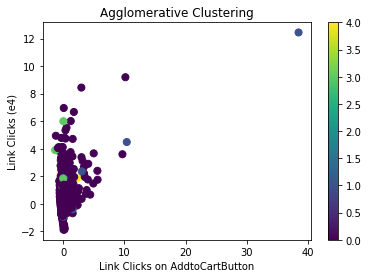

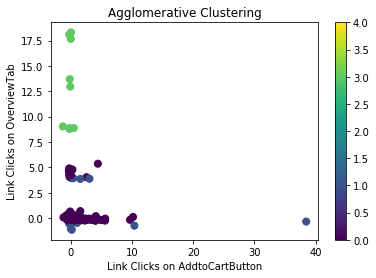

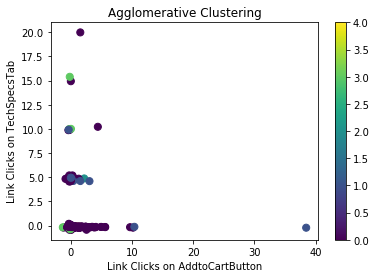

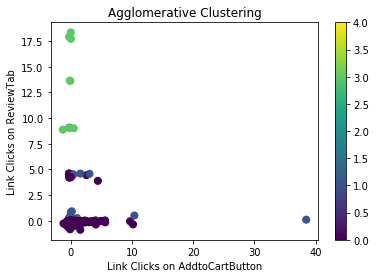

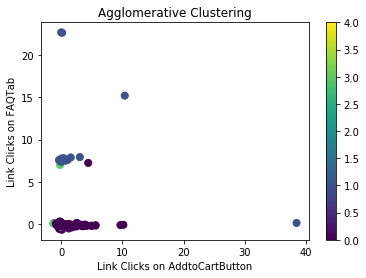

In [397]:
for cc in range(0,14):
    if np.max(df_standard_transform.iloc[:,cc])==1 and np.min(df_standard_transform.iloc[:,cc])==0 :
            continue
    for r in range(0,14):
        if cc == r:
            #print ("same")
            continue
        elif np.max(df_standard_transform.iloc[:,r])==1 and np.min(df_standard_transform.iloc[:,r])==0 :
            continue
        #print (cc ,",", r)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        scatter = ax.scatter(df_standard_transform.iloc[:,cc],df_standard_transform.iloc[:,r],
                     c=df_standard_transform['agglomerative'],s=50)
        ax.set_title('Agglomerative Clustering')
        ax.set_xlabel(cols[cc])
        ax.set_ylabel(cols[r])
        plt.colorbar(scatter)

In [48]:
df_standard.head()
df_standard.drop(['kmeans', 'kmeans_4', 'agglomerative'], axis=1, inplace=True)

Paid Order Exists  Try Exists  Device Orders_Office  Total Visits  \
0          -0.338617   -0.170054             24.356599      3.839983   
1          -0.338617   -0.170054             16.208726      1.783592   
2           2.953187   -0.170054              8.060853     -0.272798   
3           2.953187   -0.170054              8.060853     -0.272798   
4           2.953187   -0.170054              8.060853     -0.272798   

   New Visitors  Return Visitors  Enter PDP from Office.com  \
0     -1.040739         1.040739                  -0.245546   
1      0.960855        -0.960855                  -0.245546   
2     -1.040739         1.040739                  -0.245546   
3     -1.040739         1.040739                  -0.245546   
4     -1.040739         1.040739                  -0.245546   

   Enter PDP from Store  Enter PDP from O365 Web  \
0             -0.615528                -0.756132   
1             -0.615528                -0.756132   
2             -0.615528                 1.081517   
3             -0.615528                -0.756132   
4             -0.615528                -0.756132   

   Time Spent per Visit (seconds)      ...        Link Clicks (e4)  \
0                        0.218917      ...                2.842625   
1                        0.075876      ...               -0.361259   
2                        1.209529      ...                1.240683   
3                        2.408976      ...                2.122911   
4                        0.453761      ...                0.265587   

   Link Clicks on OverviewTab  Link Clicks on TechSpecsTab  \
0                   -0.083989                    12.178270   
1                   -0.083989                    -0.126227   
2                   -0.083989                    -0.126227   
3                   -0.083989                    -0.126227   
4                   -0.083989                    -0.126227   

   Link Clicks on ReviewTab  Link Clicks on FAQTab  \
0                 23.647165              -0.097815   
1                 -0.103467              -0.097815   
2                 -0.103467              -0.097815   
3                 -0.103467              -0.097815   
4                 -0.103467              -0.097815   

   Link Clicks on AddtoCartButton  Link Clicks on Trial link  kmeans  \
0                       -0.161255                  -0.135679       2   
1                       -0.161255                  -0.135679       4   
2                       -0.161255                  -0.135679       0   
3                       -0.161255                  -0.135679       0   
4                       -0.161255                   1.457542       0   

   kmeans_4  agglomerative  
0         2              0  
1         0              0  
2         1              0  
3         1              0  
4         1              0  

[5 rows x 21 columns]

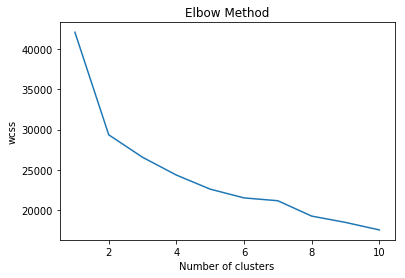

In [49]:
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(df_standard)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [60]:
##Fitting kmeans to the dataset with k=8
km2=KMeans(n_clusters=2,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km2.fit_predict(df_standard)

# #Visualizing the clusters for k=4
# plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
# plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
# plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
# plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
# plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
# plt.title('Customer segments')
# plt.xlabel('Annual income of customer')
# plt.ylabel('Annual spend from customer on site')
# plt.legend()
# plt.show()

In [61]:
df['kmeans_2'] = y_means

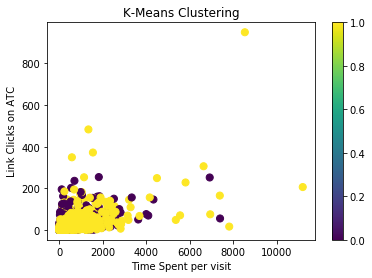

In [62]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df['Time Spent per Visit (seconds)'],df['Link Clicks (e4)'],
                     c=df['kmeans_2'],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Time Spent per visit')
ax.set_ylabel('Link Clicks on ATC')
plt.colorbar(scatter)

In [69]:
kmeansModel.inertia_

17304.20424327441

In [70]:
from sklearn.decomposition import PCA

In [74]:
df_standard.drop(['kmeans', 'kmeans_4', 'agglomerative'], axis = 1, inplace=True)
df_standard.head()

Paid Order Exists  Try Exists  Device Orders_Office  Total Visits  \
0          -0.338617   -0.170054             24.356599      3.839983   
1          -0.338617   -0.170054             16.208726      1.783592   
2           2.953187   -0.170054              8.060853     -0.272798   
3           2.953187   -0.170054              8.060853     -0.272798   
4           2.953187   -0.170054              8.060853     -0.272798   

   New Visitors  Return Visitors  Enter PDP from Office.com  \
0     -1.040739         1.040739                  -0.245546   
1      0.960855        -0.960855                  -0.245546   
2     -1.040739         1.040739                  -0.245546   
3     -1.040739         1.040739                  -0.245546   
4     -1.040739         1.040739                  -0.245546   

   Enter PDP from Store  Enter PDP from O365 Web  \
0             -0.615528                -0.756132   
1             -0.615528                -0.756132   
2             -0.615528                 1.081517   
3             -0.615528                -0.756132   
4             -0.615528                -0.756132   

   Time Spent per Visit (seconds)  Average Time Spent on Page (seconds)  \
0                        0.218917                              0.000000   
1                        0.075876                             -0.374645   
2                        1.209529                             -0.326534   
3                        2.408976                             -0.357911   
4                        0.453761                              0.000000   

   Link Clicks (e4)  Link Clicks on OverviewTab  Link Clicks on TechSpecsTab  \
0          2.842625                   -0.083989                    12.178270   
1         -0.361259                   -0.083989                    -0.126227   
2          1.240683                   -0.083989                    -0.126227   
3          2.122911                   -0.083989                    -0.126227   
4          0.265587                   -0.083989                    -0.126227   

   Link Clicks on ReviewTab  Link Clicks on FAQTab  \
0                 23.647165              -0.097815   
1                 -0.103467              -0.097815   
2                 -0.103467              -0.097815   
3                 -0.103467              -0.097815   
4                 -0.103467              -0.097815   

   Link Clicks on AddtoCartButton  Link Clicks on Trial link  
0                       -0.161255                  -0.135679  
1                       -0.161255                  -0.135679  
2                       -0.161255                  -0.135679  
3                       -0.161255                  -0.135679  
4                       -0.161255                   1.457542

In [75]:
df_standard.shape

(2383, 18)

In [76]:
pca = PCA(18)

In [77]:
pca.fit(df_standard)
pca_data = pd.DataFrame(pca.transform(df_standard)) 
  
print(pca_data.head())

          0         1          2         3         4          5          6   \
0  21.139763  5.201005 -16.949459  0.614994 -0.709856  14.304419  14.881491   
1   2.405854  1.718728  -4.136986  0.238017 -0.231134   8.757359   8.547686   
2   2.462022 -0.594020  -1.070709  1.377083 -1.701183   3.660328   5.201499   
3   3.211655 -0.482616  -0.433760  0.283977 -2.764620   3.675394   4.889072   
4   1.911008 -0.803724  -1.549710 -0.010466 -2.142887   3.800791   4.909834   

         7         8         9         10        11        12        13  \
0 -0.725118  0.459428  1.264389  8.550238 -1.204571  0.394183  2.664601   
1 -0.789921  1.669159  1.124357  6.405023 -1.373379 -3.467858 -3.091509   
2 -2.705117 -0.234982  1.836088  1.914379 -0.641037 -1.642686 -1.580854   
3 -2.899123 -0.059219  1.798587  2.227250 -1.572302 -1.503315 -1.616364   
4 -1.757169 -0.213067  2.984931  2.478625  0.228812 -1.541087 -1.767098   

         14        15        16            17  
0  2.937157  6.725701  0.8